# Banking research analysis 1

Research question:
 - comparison in terms of capialization of euro area banks in terms of country, time, specialisations
 - are eu banks sufficiently capitalized (equity - min_equity)
 - see which banks are riskier and their type (commercial or investment?)
 - effects of crisis on banks
 - commercial vs investment
 Non controlling interest column: total value of all the subsidiaries of bank x

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

## Data preparation

Our original dataset included 1502 observations. These data was gathered from BankFocus with the following search parameters:

add image

Before importing the data we filtered it in Excel by:
- last available year (2021, 2022). In this way we filtered for all the banks that were active at least until 2021 (and so we removed all those banks that didn't have data up to 2021)
- Consolidation code (C2). We decided to select just banks with the consolidation code C2, since it appear to us to be the most complete in terms of financial information. In fact, C2 is code for a statement of a mother bank that is integrating the statements of its controlled subsidiaries or branches with an unconsolidated companion (the so called imprese collegate, the parent company does not have a controlling stake in the subsidiary). 

This resulted in a dataframe with 215 singular observation (So that each observation is a single entity, a bank). 
Additionaly, since for our purposes the Tier 1 and Common Tier 1 are very important metrics, we dropped all those observation that presented multiple NAs value for the columns referred to the these attributes. 

So the final dataframe include 131 observations. 

Before importing the data we manually calculated and added using Excel 6 columns for the leverage ratios in the period 2016-2021 and 6 columns for the CET1 Ratio, since the ones we found in BankFocus presented a lot of missing values. 
Leverage ratio is hence defined as Tier 1 Capital/Total assets while CET1 ratio is CET1/Risk weighted assets.
 

In [34]:
data = pd.read_excel("EUBanks.xlsx", sheet_name="Results filtered")

In [35]:
#Visualization options
pd.set_option("Display.max_columns", None)


In [36]:
#First look
display(data)

,Company name Latin alphabet,Inactive,Quoted,Branch,OwnData,Woco,Sifi,Country ISO code,Consolidation code,Specialisation,Last avail. year,Tier 1 Capital\nm EUR 2021,Tier 1 Capital\nm EUR 2020,Tier 1 Capital\nm EUR 2019,Tier 1 Capital\nm EUR 2018,Tier 1 Capital\nm EUR 2017,Tier 1 Capital\nm EUR 2016,Common Equity / Core Tier 1 (CET1) (as reported)\nm EUR 2021,Common Equity / Core Tier 1 (CET1) (as reported)\nm EUR 2020,Common Equity / Core Tier 1 (CET1) (as reported)\nm EUR 2019,Common Equity / Core Tier 1 (CET1) (as reported)\nm EUR 2018,Common Equity / Core Tier 1 (CET1) (as reported)\nm EUR 2017,Common Equity / Core Tier 1 (CET1) (as reported)\nm EUR 2016,Total equity\nm EUR 2021,Total equity\nm EUR 2020,Total equity\nm EUR 2019,Total equity\nm EUR 2018,Total equity\nm EUR 2017,Total equity\nm EUR 2016,Risk weighted asset intensity (RWA / Total Assets) (%)\n2021,Risk weighted asset intensity (RWA / Total Assets) (%)\n2020,Risk weighted asset intensity (RWA / Total Assets) (%)\n2019,Risk weighted asset intensity (RWA / Total Assets) (%)\n2018,Risk weighted asset intensity (RWA / Total Assets) (%)\n2017,Risk weighted asset intensity (RWA / Total Assets) (%)\n2016,Total risk weighted assets (RWAs) - Transitional (highest)\nm EUR 2021,Total risk weighted assets (RWAs) - Transitional (highest)\nm EUR 2020,Total risk weighted assets (RWAs) - Transitional (highest)\nm EUR 2019,Total risk weighted assets (RWAs) - Transitional (highest)\nm EUR 2018,Total risk weighted assets (RWAs) - Transitional (highest)\nm EUR 2017,Total risk weighted assets (RWAs) - Transitional (highest)\nm EUR 2016,Total assets\nm EUR 2021,Total assets\nm EUR 2020,Total assets\nm EUR 2019,Total assets\nm EUR 2018,Total assets\nm EUR 2017,Total assets\nm EUR 2016,Total capital adequacy ratio - Transitional (%)\n2021,Total capital adequacy ratio - Transitional (%)\n2020,Total capital adequacy ratio - Transitional (%)\n2019,Total capital adequacy ratio - Transitional (%)\n2018,Total capital adequacy ratio - Transitional (%)\n2017,Total capital adequacy ratio - Transitional (%)\n2016,Tier 1 Ratio (%)\n2021,Tier 1 Ratio (%)\n2020,Tier 1 Ratio (%)\n2019,Tier 1 Ratio (%)\n2018,Tier 1 Ratio (%)\n2017,Tier 1 Ratio (%)\n2016,Leverage ratio 2021,Leverage ratio 2020,Leverage ratio 2019,Leverage ratio 2018,Leverage ratio 2017,Leverage ratio 2016,CET1 ratio 2021,CET1 ratio 2020,CET1 ratio 2019,CET1 ratio 2018,CET1 ratio 2017,CET1 ratio 2016
0,BNP PARIBAS,No,Yes,No,No,Yes,Yes,FR,C2,Commercial bank,2022,99668,97772,89962,84773,83766,80944,91389,87732,81204,76131,75741,73562,122507,117349,111845,105726,107209,105220,27,28,31,32,33,31,713671,695523,668828,647001,640644,638207,2634444,2488491,2164713,2040836,1952166,2076959,16,16,16,15,15,15,14,14,14,13,13,13,3.783265,3.928967,4.155840,4.153837,4.290926,3.897236,12.805480,12.613817,12.141238,11.766752,11.822635,11.526354
1,BANCO SANTANDER SA,No,Yes,No,No,Yes,Yes,ES,C2,Commercial bank,2022,79939,78126,78964,75838,73293,67834,70208,69399,70497,66904,65563,62068,97053,91322,110659,107361,106833,102699,36,37,40,41,42,44,601845,562580,605244,592319,605064,588088,1595835,1508250,1522695,1459271,1444305,1339125,17,16,15,15,15,15,14,14,13,13,12,12,5.009227,5.179910,5.185805,5.196978,5.074621,5.065547,11.665462,12.335846,11.647699,11.295265,10.835713,10.554203
2,SOCIETE GENERALE,No,Yes,No,No,Yes,Yes,FR,C2,Commercial bank,2022,57900,55263,53892,50511,48907,51548,49800,46374,45764,41154,40227,40937,70863,67012,68570,65809,64037,65706,25,24,25,29,28,26,363400,351852,345010,376049,353306,n.a.,1464449,1444404,1356495,1309428,1275128,1354422,19,19,n.a.,n.a.,17,18,16,16,16,13,14,15,3.953705,3.826007,3.972886,3.857486,3.835458,3.805904,13.703908,13.179973,13.264543,10.943787,11.385881,NaN
3,DEUTSCHE BANK AG,No,Yes,No,No,Yes,Yes,DE,C2,Commercial bank,2022,54774,50633,48732,52081,52921,46830,46506,44885,44148,47486,48300,42279,68030,62196,62160,68737,68099,64819,27,25,25,26,23,22,351630,328952,324015,350432,343316,356235,1323993,1325259,1297674,134

In [37]:
#Replacing n.a. strings with numpy NaN
data.replace("n.a.", np.nan, inplace=True)

In [38]:
#Columns type look
data.dtypes

Company name Latin alphabet     object
Inactive                        object
Quoted                          object
Branch                          object
OwnData                         object
                                ...   
CET1 ratio 2020                float64
CET1 ratio 2019                float64
CET1 ratio 2018                float64
CET1 ratio 2017                float64
CET1 ratio 2016                float64
Length: 71, dtype: object

In [39]:
#Removing unuseful columns
data.drop(columns=["OwnData", "Woco", "Branch", "Inactive"], inplace=True)

In [40]:
data.rename(columns={"Company name Latin alphabet": "Bank name"}, inplace=True)

In [41]:
#Printing columns indexes
for i in range(len(data.columns)):
    print(str(i) + "\t" + data.columns[i])

0	Bank name
1	Quoted
2	Sifi
3	Country ISO code
4	Consolidation code
5	Specialisation
6	Last avail. year
7	Tier 1 Capital
m EUR 2021
8	Tier 1 Capital
m EUR 2020
9	Tier 1 Capital
m EUR 2019
10	Tier 1 Capital
m EUR 2018
11	Tier 1 Capital
m EUR 2017
12	Tier 1 Capital
m EUR 2016
13	Common Equity / Core Tier 1 (CET1) (as reported)
m EUR 2021
14	Common Equity / Core Tier 1 (CET1) (as reported)
m EUR 2020
15	Common Equity / Core Tier 1 (CET1) (as reported)
m EUR 2019
16	Common Equity / Core Tier 1 (CET1) (as reported)
m EUR 2018
17	Common Equity / Core Tier 1 (CET1) (as reported)
m EUR 2017
18	Common Equity / Core Tier 1 (CET1) (as reported)
m EUR 2016
19	Total equity
m EUR 2021
20	Total equity
m EUR 2020
21	Total equity
m EUR 2019
22	Total equity
m EUR 2018
23	Total equity
m EUR 2017
24	Total equity
m EUR 2016
25	Risk weighted asset intensity (RWA / Total Assets) (%)
2021
26	Risk weighted asset intensity (RWA / Total Assets) (%)
2020
27	Risk weighted asset intensity (RWA / Total Assets) (%)
2

In [42]:
#Rename columns

data.rename(columns={"Total risk weighted assets (RWAs) - Transitional (highest)\nm EUR 2021": "Total Risk Weighted Assets 2021",
                     "Total risk weighted assets (RWAs) - Transitional (highest)\nm EUR 2020": "Total Risk Weighted Assets 2020",
                     "Total risk weighted assets (RWAs) - Transitional (highest)\nm EUR 2019": "Total Risk Weighted Assets 2019",
                     "Total risk weighted assets (RWAs) - Transitional (highest)\nm EUR 2018": "Total Risk Weighted Assets 2018",
                     "Total risk weighted assets (RWAs) - Transitional (highest)\nm EUR 2017": "Total Risk Weighted Assets 2017",
                     "Total risk weighted assets (RWAs) - Transitional (highest)\nm EUR 2016": "Total Risk Weighted Assets 2016",

                     "Tier 1 Capital\nm EUR 2021": "Tier 1 2021",
                     "Tier 1 Capital\nm EUR 2020": "Tier 1 2020",
                     "Tier 1 Capital\nm EUR 2019": "Tier 1 2019",
                     "Tier 1 Capital\nm EUR 2018": "Tier 1 2018",
                     "Tier 1 Capital\nm EUR 2017": "Tier 1 2017",
                     "Tier 1 Capital\nm EUR 2016": "Tier 1 2016",

                     "Total assets\nm EUR 2021": "Total assets 2021",
                     "Total assets\nm EUR 2020": "Total assets 2020",
                     "Total assets\nm EUR 2019": "Total assets 2019",
                     "Total assets\nm EUR 2018": "Total assets 2018",
                     "Total assets\nm EUR 2017": "Total assets 2017",
                     "Total assets\nm EUR 2016": "Total assets 2016",

                     "Total equity\nm EUR 2021": "Total equity 2021",
                     "Total equity\nm EUR 2020": "Total equity 2020",
                     "Total equity\nm EUR 2019": "Total equity 2019",
                     "Total equity\nm EUR 2018": "Total equity 2018",
                     "Total equity\nm EUR 2017": "Total equity 2017",
                     "Total equity\nm EUR 2016": "Total equity 2016",

                     "Common Equity / Core Tier 1 (CET1) (as reported)\nm EUR 2021": "Common equity (CET1) 2021",
                     "Common Equity / Core Tier 1 (CET1) (as reported)\nm EUR 2020": "Common equity (CET1) 2020",
                     "Common Equity / Core Tier 1 (CET1) (as reported)\nm EUR 2019": "Common equity (CET1) 2019",
                     "Common Equity / Core Tier 1 (CET1) (as reported)\nm EUR 2018": "Common equity (CET1) 2018",
                     "Common Equity / Core Tier 1 (CET1) (as reported)\nm EUR 2017": "Common equity (CET1) 2017",
                     "Common Equity / Core Tier 1 (CET1) (as reported)\nm EUR 2016": "Common equity (CET1) 2016",

                     "Risk weighted asset intensity (RWA / Total Assets) (%)\n2021": "RWA intensity 2021",
                     "Risk weighted asset intensity (RWA / Total Assets) (%)\n2019": "RWA intensity 2019",
                     "Risk weighted asset intensity (RWA / Total Assets) (%)\n2020": "RWA intensity 2020",
                     "Risk weighted asset intensity (RWA / Total Assets) (%)\n2018": "RWA intensity 2018",
                     "Risk weighted asset intensity (RWA / Total Assets) (%)\n2017": "RWA intensity 2017",
                     "Risk weighted asset intensity (RWA / Total Assets) (%)\n2016": "RWA intensity 2016",

                     "Basel III leverage ratio (as reported) (%)\n2021":"Basel III leverage ratio(%) 2021",
                     "Basel III leverage ratio (as reported) (%)\n2020":"Basel III leverage ratio(%) 2020",
                     "Basel III leverage ratio (as reported) (%)\n2019":"Basel III leverage ratio(%) 2019",
                     "Basel III leverage ratio (as reported) (%)\n2018":"Basel III leverage ratio(%) 2018",
                     "Basel III leverage ratio (as reported) (%)\n2017":"Basel III leverage ratio(%) 2017",
                     "Basel III leverage ratio (as reported) (%)\n2016":"Basel III leverage ratio(%) 2016",
                     
                     "Total capital adequacy ratio - Transitional (%)\n2021":"Cap adequacy ratio 2021",
                     "Total capital adequacy ratio - Transitional (%)\n2020":"Cap adequacy ratio 2020",
                     "Total capital adequacy ratio - Transitional (%)\n2019":"Cap adequacy ratio 2019",
                     "Total capital adequacy ratio - Transitional (%)\n2018":"Cap adequacy ratio 2018",
                     "Total capital adequacy ratio - Transitional (%)\n2017":"Cap adequacy ratio 2017",
                     "Total capital adequacy ratio - Transitional (%)\n2016":"Cap adequacy ratio 2016",
                     

                     },
                     inplace=True)
data.head()

,Bank name,Quoted,Sifi,Country ISO code,Consolidation code,Specialisation,Last avail. year,Tier 1 2021,Tier 1 2020,Tier 1 2019,Tier 1 2018,Tier 1 2017,Tier 1 2016,Common equity (CET1) 2021,Common equity (CET1) 2020,Common equity (CET1) 2019,Common equity (CET1) 2018,Common equity (CET1) 2017,Common equity (CET1) 2016,Total equity 2021,Total equity 2020,Total equity 2019,Total equity 2018,Total equity 2017,Total equity 2016,RWA intensity 2021,RWA intensity 2020,RWA intensity 2019,RWA intensity 2018,RWA intensity 2017,RWA intensity 2016,Total Risk Weighted Assets 2021,Total Risk Weighted Assets 2020,Total Risk Weighted Assets 2019,Total Risk Weighted Assets 2018,Total Risk Weighted Assets 2017,Total Risk Weighted Assets 2016,Total assets 2021,Total assets 2020,Total assets 2019,Total assets 2018,Total assets 2017,Total assets 2016,Cap adequacy ratio 2021,Cap adequacy ratio 2020,Cap adequacy ratio 2019,Cap adequacy ratio 2018,Cap adequacy ratio 2017,Cap adequacy ratio 2016,Tier 1 Ratio (%)\n2021,Tier 1 Ratio (%)\n2020,Tier 1 Ratio (%)\n2019,Tier 1 Ratio (%)\n2018,Tier 1 Ratio (%)\n2017,Tier 1 Ratio (%)\n2016,Leverage ratio 2021,Leverage ratio 2020,Leverage ratio 2019,Leverage ratio 2018,Leverage ratio 2017,Leverage ratio 2016,CET1 ratio 2021,CET1 ratio 2020,CET1 ratio 2019,CET1 ratio 2018,CET1 ratio 2017,CET1 ratio 2016
0,BNP PARIBAS,Yes,Yes,FR,C2,Commercial bank,2022,99668,97772,89962,84773,83766,80944,91389,87732,81204,76131,75741,73562,122507,117349,111845,105726,107209,105220,27.0,28.0,31.0,32.0,33.0,31.0,713671.0,695523.0,668828.0,647001.0,640644.0,638207.0,2634444,2488491,2164713,2040836,1952166,2076959,16.0,16.0,16.0,15.0,15.0,15.0,14.0,14.0,14.0,13.0,13.0,13.0,3.783265,3.928967,4.155840,4.153837,4.290926,3.897236,12.805480,12.613817,12.141238,11.766752,11.822635,11.526354
1,BANCO SANTANDER SA,Yes,Yes,ES,C2,Commercial bank,2022,79939,78126,78964,75838,73293,67834,70208,69399,70497,66904,65563,62068,97053,91322,110659,107361,106833,102699,36.0,37.0,40.0,41.0,42.0,44.0,601845.0,562580.0,605244.0,592319.0,605064.0,588088.0,1595835,1508250,1522695,1459271,1444305,1339125,17.0,16.0,15.0,15.0,15.0,15.0,14.0,14.0,13.0,13.0,12.0,12.0,5.009227,5.179910,5.185805,5.196978,5.074621,5.065547,11.665462,12.335846,11.647699,11.295265,10.835713,10.554203
2,SOCIETE GENERALE,Yes,Yes,FR,C2,Commercial bank,2022,57900,55263,53892,50511,48907,51548,49800,46374,45764,41154,40227,40937,70863,67012,68570,65809,64037,65706,25.0,24.0,25.0,29.0,28.0,26.0,363400.0,351852.0,345010.0,376049.0,353306.0,NaN,1464449,1444404,1356495,1309428,1275128,1354422,19.0,19.0,NaN,NaN,17.0,18.0,16.0,16.0,16.0,13.0,14.0,15.0,3.953705,3.826007,3.972886,3.857486,3.835458,3.805904,13.703908,13.179973,13.264543,10.943787,11.385881,NaN
3,DEUTSCHE BANK AG,Yes,Yes,DE,C2,Commercial bank,2022,54774,50633,48732,52081,52921,46830,46506,44885,44148,47486,48300,42279,68030,62196,62160,68737,68099,64819,27.0,25.0,25.0,26.0,23.0,22.0,351630.0,328952.0,324015.0,350432.0,343316.0,356235.0,1323993,1325259,1297674,1348137,1474732,1590546,18.0,18.0,17.0,18.0,19.0,17.0,16.0,15.0,15.0,15.0,15.0,13.0,4.137031,3.820612,3.755335,3.863183,3.588516,2.944272,13.225834,13.644848,13.625295,13.550703,14.068671,11.868289
4,INTESA SANPAOLO,Yes,No,IT,C2,Commercial bank,2022,51999,56427,43048,37928,43465,39459,45735,48941,38952,33072,38051,35926,64066,66321,56522,54350,56604,49319,31.0,35.0,37.0,35.0,36.0,39.0,326903.0,347072.0,298524.0,276446.0,286825.0,283918.0,1069003,1002614,816570,787790,796861,725138,19.0,20.0,18.0,18.0,18.0,17.0,16.0,16.0,14.0,14.0,15.0,14.0,4.864252,5.627988,5.271808,4.814481,5.454527,5.441585,13.990389,14.101109,13.048197,11.963277,13.266277,12.653654


In [43]:
# Storing useful data
specialisations = ['Investment bank', 'Commercial bank']

country_codes = data["Country ISO code"].unique()
country_codes

array(['FR', 'ES', 'DE', 'IT', 'NL', 'BE', 'AT', 'IE', 'PT', 'GR', 'LU',
       'SK', 'HR', 'SI', 'CY', 'LT', 'MT', 'EE', 'FI', 'LV'], dtype=object)

In [44]:
# create dictionary for country names
country_codes_dict = {
    'FR': 'France',
    'ES': 'Spain',
    'DE': 'Germany',
    'IT': 'Italy',
    'NL': 'Netherlands',
    'BE': 'Belgium',
    'AT': 'Austria',
    'IE': 'Ireland',
    'PT': 'Portugal',
    'GR': 'Greece',
    'LU': 'Luxembourg',
    'SK': 'Slovakia',
    'HR': 'Croatia',
    'SI': 'Slovenia',
    'CY': 'Cyprus',
    'LT': 'Lithuania',
    'MT': 'Malta',
    'EE': 'Estonia',
    'FI': 'Finland',
    'LV': 'Latvia'
}

In [45]:
country_dict = dict()
for country in country_codes:
    country_dict[country] = data[data["Country ISO code"] == country].reset_index(drop=True)

In [46]:
data.head()

,Bank name,Quoted,Sifi,Country ISO code,Consolidation code,Specialisation,Last avail. year,Tier 1 2021,Tier 1 2020,Tier 1 2019,Tier 1 2018,Tier 1 2017,Tier 1 2016,Common equity (CET1) 2021,Common equity (CET1) 2020,Common equity (CET1) 2019,Common equity (CET1) 2018,Common equity (CET1) 2017,Common equity (CET1) 2016,Total equity 2021,Total equity 2020,Total equity 2019,Total equity 2018,Total equity 2017,Total equity 2016,RWA intensity 2021,RWA intensity 2020,RWA intensity 2019,RWA intensity 2018,RWA intensity 2017,RWA intensity 2016,Total Risk Weighted Assets 2021,Total Risk Weighted Assets 2020,Total Risk Weighted Assets 2019,Total Risk Weighted Assets 2018,Total Risk Weighted Assets 2017,Total Risk Weighted Assets 2016,Total assets 2021,Total assets 2020,Total assets 2019,Total assets 2018,Total assets 2017,Total assets 2016,Cap adequacy ratio 2021,Cap adequacy ratio 2020,Cap adequacy ratio 2019,Cap adequacy ratio 2018,Cap adequacy ratio 2017,Cap adequacy ratio 2016,Tier 1 Ratio (%)\n2021,Tier 1 Ratio (%)\n2020,Tier 1 Ratio (%)\n2019,Tier 1 Ratio (%)\n2018,Tier 1 Ratio (%)\n2017,Tier 1 Ratio (%)\n2016,Leverage ratio 2021,Leverage ratio 2020,Leverage ratio 2019,Leverage ratio 2018,Leverage ratio 2017,Leverage ratio 2016,CET1 ratio 2021,CET1 ratio 2020,CET1 ratio 2019,CET1 ratio 2018,CET1 ratio 2017,CET1 ratio 2016
0,BNP PARIBAS,Yes,Yes,FR,C2,Commercial bank,2022,99668,97772,89962,84773,83766,80944,91389,87732,81204,76131,75741,73562,122507,117349,111845,105726,107209,105220,27.0,28.0,31.0,32.0,33.0,31.0,713671.0,695523.0,668828.0,647001.0,640644.0,638207.0,2634444,2488491,2164713,2040836,1952166,2076959,16.0,16.0,16.0,15.0,15.0,15.0,14.0,14.0,14.0,13.0,13.0,13.0,3.783265,3.928967,4.155840,4.153837,4.290926,3.897236,12.805480,12.613817,12.141238,11.766752,11.822635,11.526354
1,BANCO SANTANDER SA,Yes,Yes,ES,C2,Commercial bank,2022,79939,78126,78964,75838,73293,67834,70208,69399,70497,66904,65563,62068,97053,91322,110659,107361,106833,102699,36.0,37.0,40.0,41.0,42.0,44.0,601845.0,562580.0,605244.0,592319.0,605064.0,588088.0,1595835,1508250,1522695,1459271,1444305,1339125,17.0,16.0,15.0,15.0,15.0,15.0,14.0,14.0,13.0,13.0,12.0,12.0,5.009227,5.179910,5.185805,5.196978,5.074621,5.065547,11.665462,12.335846,11.647699,11.295265,10.835713,10.554203
2,SOCIETE GENERALE,Yes,Yes,FR,C2,Commercial bank,2022,57900,55263,53892,50511,48907,51548,49800,46374,45764,41154,40227,40937,70863,67012,68570,65809,64037,65706,25.0,24.0,25.0,29.0,28.0,26.0,363400.0,351852.0,345010.0,376049.0,353306.0,NaN,1464449,1444404,1356495,1309428,1275128,1354422,19.0,19.0,NaN,NaN,17.0,18.0,16.0,16.0,16.0,13.0,14.0,15.0,3.953705,3.826007,3.972886,3.857486,3.835458,3.805904,13.703908,13.179973,13.264543,10.943787,11.385881,NaN
3,DEUTSCHE BANK AG,Yes,Yes,DE,C2,Commercial bank,2022,54774,50633,48732,52081,52921,46830,46506,44885,44148,47486,48300,42279,68030,62196,62160,68737,68099,64819,27.0,25.0,25.0,26.0,23.0,22.0,351630.0,328952.0,324015.0,350432.0,343316.0,356235.0,1323993,1325259,1297674,1348137,1474732,1590546,18.0,18.0,17.0,18.0,19.0,17.0,16.0,15.0,15.0,15.0,15.0,13.0,4.137031,3.820612,3.755335,3.863183,3.588516,2.944272,13.225834,13.644848,13.625295,13.550703,14.068671,11.868289
4,INTESA SANPAOLO,Yes,No,IT,C2,Commercial bank,2022,51999,56427,43048,37928,43465,39459,45735,48941,38952,33072,38051,35926,64066,66321,56522,54350,56604,49319,31.0,35.0,37.0,35.0,36.0,39.0,326903.0,347072.0,298524.0,276446.0,286825.0,283918.0,1069003,1002614,816570,787790,796861,725138,19.0,20.0,18.0,18.0,18.0,17.0,16.0,16.0,14.0,14.0,15.0,14.0,4.864252,5.627988,5.271808,4.814481,5.454527,5.441585,13.990389,14.101109,13.048197,11.963277,13.266277,12.653654


In [47]:
data[data['Specialisation'] == 'Investment bank']['RWA intensity 2021'].dropna()

56     27.0
71     51.0
88     50.0
92     31.0
112    39.0
118    35.0
119    85.0
121    68.0
122    43.0
123    54.0
128    42.0
130    49.0
Name: RWA intensity 2021, dtype: float64

## Introduction. 

The financial crisis of 2007 and 2008 was driven by financial institutions investing in subprime home mortgage loans that had a far higher risk of default than bank managers and regulators believed to be possible. When consumers started to default on their mortgages, many financial institutions lost large amounts of capital, and some became insolvent.

Basel III, a set of international banking regulations, set forth certain guidelines to avoid this problem moving forward. Regulators insisted that each bank must group its assets together by risk category so that the amount of required capital is matched with the risk level of each asset type. Basel III uses credit ratings of certain assets to establish their risk coefficients. The goal was to prevent banks from losing large amounts of capital when a particular asset class declines sharply in value.


## Equity Analysis

In [48]:
avg_equity = pd.DataFrame({"Country" : country_codes})

for year in range(2016,2022):
    list_equity = []
    for country in country_codes:
        list_equity.append(data[data['Country ISO code'] == country]['Total equity ' + str(year)].mean(skipna= True))
    avg_equity[str(year)] = list_equity

avg_equity.sort_values(by='2021', ascending=False, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

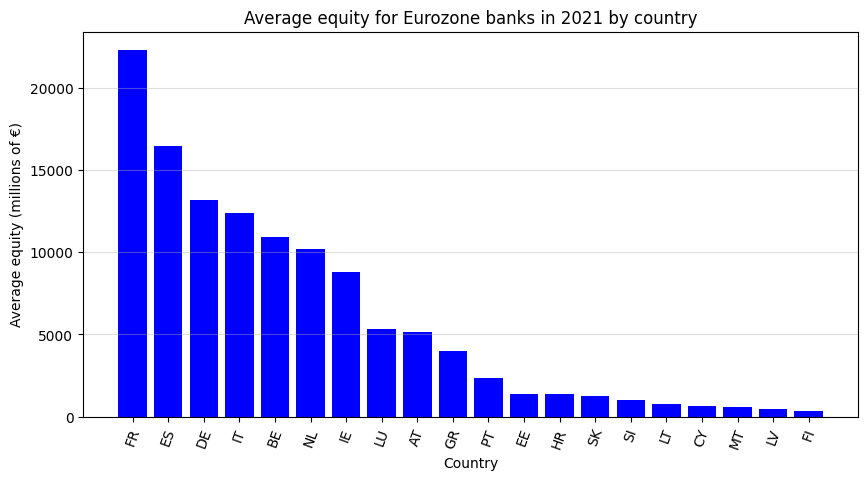

In [49]:
# Average number of equity for EMU COUNTRIES (in 2021)
# Create a figure and axis object

plt.figure(figsize= (10, 5))
plt.bar(avg_equity['Country'], avg_equity['2021'], color = 'blue')
plt.xlabel("Country")
plt.ylabel("Average equity (millions of €)")
plt.title("Average equity for Eurozone banks in 2021 by country")
plt.xticks(rotation=70)
plt.grid(alpha=0.4, axis='y')

plt.show

In [50]:
data.head()

,Bank name,Quoted,Sifi,Country ISO code,Consolidation code,Specialisation,Last avail. year,Tier 1 2021,Tier 1 2020,Tier 1 2019,Tier 1 2018,Tier 1 2017,Tier 1 2016,Common equity (CET1) 2021,Common equity (CET1) 2020,Common equity (CET1) 2019,Common equity (CET1) 2018,Common equity (CET1) 2017,Common equity (CET1) 2016,Total equity 2021,Total equity 2020,Total equity 2019,Total equity 2018,Total equity 2017,Total equity 2016,RWA intensity 2021,RWA intensity 2020,RWA intensity 2019,RWA intensity 2018,RWA intensity 2017,RWA intensity 2016,Total Risk Weighted Assets 2021,Total Risk Weighted Assets 2020,Total Risk Weighted Assets 2019,Total Risk Weighted Assets 2018,Total Risk Weighted Assets 2017,Total Risk Weighted Assets 2016,Total assets 2021,Total assets 2020,Total assets 2019,Total assets 2018,Total assets 2017,Total assets 2016,Cap adequacy ratio 2021,Cap adequacy ratio 2020,Cap adequacy ratio 2019,Cap adequacy ratio 2018,Cap adequacy ratio 2017,Cap adequacy ratio 2016,Tier 1 Ratio (%)\n2021,Tier 1 Ratio (%)\n2020,Tier 1 Ratio (%)\n2019,Tier 1 Ratio (%)\n2018,Tier 1 Ratio (%)\n2017,Tier 1 Ratio (%)\n2016,Leverage ratio 2021,Leverage ratio 2020,Leverage ratio 2019,Leverage ratio 2018,Leverage ratio 2017,Leverage ratio 2016,CET1 ratio 2021,CET1 ratio 2020,CET1 ratio 2019,CET1 ratio 2018,CET1 ratio 2017,CET1 ratio 2016
0,BNP PARIBAS,Yes,Yes,FR,C2,Commercial bank,2022,99668,97772,89962,84773,83766,80944,91389,87732,81204,76131,75741,73562,122507,117349,111845,105726,107209,105220,27.0,28.0,31.0,32.0,33.0,31.0,713671.0,695523.0,668828.0,647001.0,640644.0,638207.0,2634444,2488491,2164713,2040836,1952166,2076959,16.0,16.0,16.0,15.0,15.0,15.0,14.0,14.0,14.0,13.0,13.0,13.0,3.783265,3.928967,4.155840,4.153837,4.290926,3.897236,12.805480,12.613817,12.141238,11.766752,11.822635,11.526354
1,BANCO SANTANDER SA,Yes,Yes,ES,C2,Commercial bank,2022,79939,78126,78964,75838,73293,67834,70208,69399,70497,66904,65563,62068,97053,91322,110659,107361,106833,102699,36.0,37.0,40.0,41.0,42.0,44.0,601845.0,562580.0,605244.0,592319.0,605064.0,588088.0,1595835,1508250,1522695,1459271,1444305,1339125,17.0,16.0,15.0,15.0,15.0,15.0,14.0,14.0,13.0,13.0,12.0,12.0,5.009227,5.179910,5.185805,5.196978,5.074621,5.065547,11.665462,12.335846,11.647699,11.295265,10.835713,10.554203
2,SOCIETE GENERALE,Yes,Yes,FR,C2,Commercial bank,2022,57900,55263,53892,50511,48907,51548,49800,46374,45764,41154,40227,40937,70863,67012,68570,65809,64037,65706,25.0,24.0,25.0,29.0,28.0,26.0,363400.0,351852.0,345010.0,376049.0,353306.0,NaN,1464449,1444404,1356495,1309428,1275128,1354422,19.0,19.0,NaN,NaN,17.0,18.0,16.0,16.0,16.0,13.0,14.0,15.0,3.953705,3.826007,3.972886,3.857486,3.835458,3.805904,13.703908,13.179973,13.264543,10.943787,11.385881,NaN
3,DEUTSCHE BANK AG,Yes,Yes,DE,C2,Commercial bank,2022,54774,50633,48732,52081,52921,46830,46506,44885,44148,47486,48300,42279,68030,62196,62160,68737,68099,64819,27.0,25.0,25.0,26.0,23.0,22.0,351630.0,328952.0,324015.0,350432.0,343316.0,356235.0,1323993,1325259,1297674,1348137,1474732,1590546,18.0,18.0,17.0,18.0,19.0,17.0,16.0,15.0,15.0,15.0,15.0,13.0,4.137031,3.820612,3.755335,3.863183,3.588516,2.944272,13.225834,13.644848,13.625295,13.550703,14.068671,11.868289
4,INTESA SANPAOLO,Yes,No,IT,C2,Commercial bank,2022,51999,56427,43048,37928,43465,39459,45735,48941,38952,33072,38051,35926,64066,66321,56522,54350,56604,49319,31.0,35.0,37.0,35.0,36.0,39.0,326903.0,347072.0,298524.0,276446.0,286825.0,283918.0,1069003,1002614,816570,787790,796861,725138,19.0,20.0,18.0,18.0,18.0,17.0,16.0,16.0,14.0,14.0,15.0,14.0,4.864252,5.627988,5.271808,4.814481,5.454527,5.441585,13.990389,14.101109,13.048197,11.963277,13.266277,12.653654


In [51]:
avg_tier1_country = pd.DataFrame({"Country" : country_codes})

for year in range(2016,2022):
    list_tier1_country = []
    list_tier1_ratio = []
    for country in country_codes:
        list_tier1_ratio.append(data[data['Country ISO code'] == country]['Tier 1 Ratio (%)\n' + str(year)].mean(skipna= True))
        list_tier1_country.append(data[data['Country ISO code'] == country]['Tier 1 ' + str(year)].mean(skipna= True))
    avg_tier1_country['Tier 1 Ratio (%)\n' + str(year)] = list_tier1_ratio
    avg_tier1_country['Tier 1 ' + str(year)] = list_tier1_country

In [52]:
avg_tier1_country

,Country,Tier 1 Ratio (%)\n2016,Tier 1 2016,Tier 1 Ratio (%)\n2017,Tier 1 2017,Tier 1 Ratio (%)\n2018,Tier 1 2018,Tier 1 Ratio (%)\n2019,Tier 1 2019,Tier 1 Ratio (%)\n2020,Tier 1 2020,Tier 1 Ratio (%)\n2021,Tier 1 2021
0,FR,14.500000,13936.400000,12.714286,13928.400000,13.928571,14516.066667,14.571429,15450.800000,15.533333,16731.733333,15.933333,17428.200000
1,ES,16.000000,12130.153846,15.636364,12597.384615,16.636364,12674.076923,16.500000,13372.538462,16.416667,13491.692308,16.750000,14348.000000
2,DE,14.923077,10465.846154,16.692308,10992.230769,15.692308,10618.769231,18.076923,10664.230769,18.846154,11116.384615,23.461538,11546.923077
3,IT,15.000000,7383.923077,16.076923,9537.461538,15.692308,8185.153846,16.923077,9083.692308,17.153846,10680.384615,17.153846,10311.923077
4,NL,21.857143,9296.625000,23.500000,9449.375000,24.500000,9630.625000,25.625000,10070.250000,30.500000,9948.375000,27.750000,10294.000000
5,BE,24.333333,7475.428571,25.833333,8113.571429,26.166667,8061.285714,24.833333,8349.714286,25.666667,9012.000000,23.714286,9324.142857
6,AT,16.000000,3043.818182,15.454545,3375.545455,15.090909,3610.000000,15.181818,3858.090909,16.181818,4097.727273,16.090909,4400.272727
7,IE,23.000000,7535.000000,24.500000,7755.500000,23.000000,6886.000000,23.000000,6821.500000,22.000000,6504.000000,23.500000,6834.500000
8,PT,17.538462,1414.538462,19.538462,1808.769231,26.076923,1759.615385,29.230769,1946.692308,31.923077,2006.923077,32.846154,1972.076923
9,GR,27.000000,5905.333333,25.000000,5595.000000,22.666667,3835.000000,17.666667,4109.000000,16.000000,3807.333333,12.000000,2416.666667


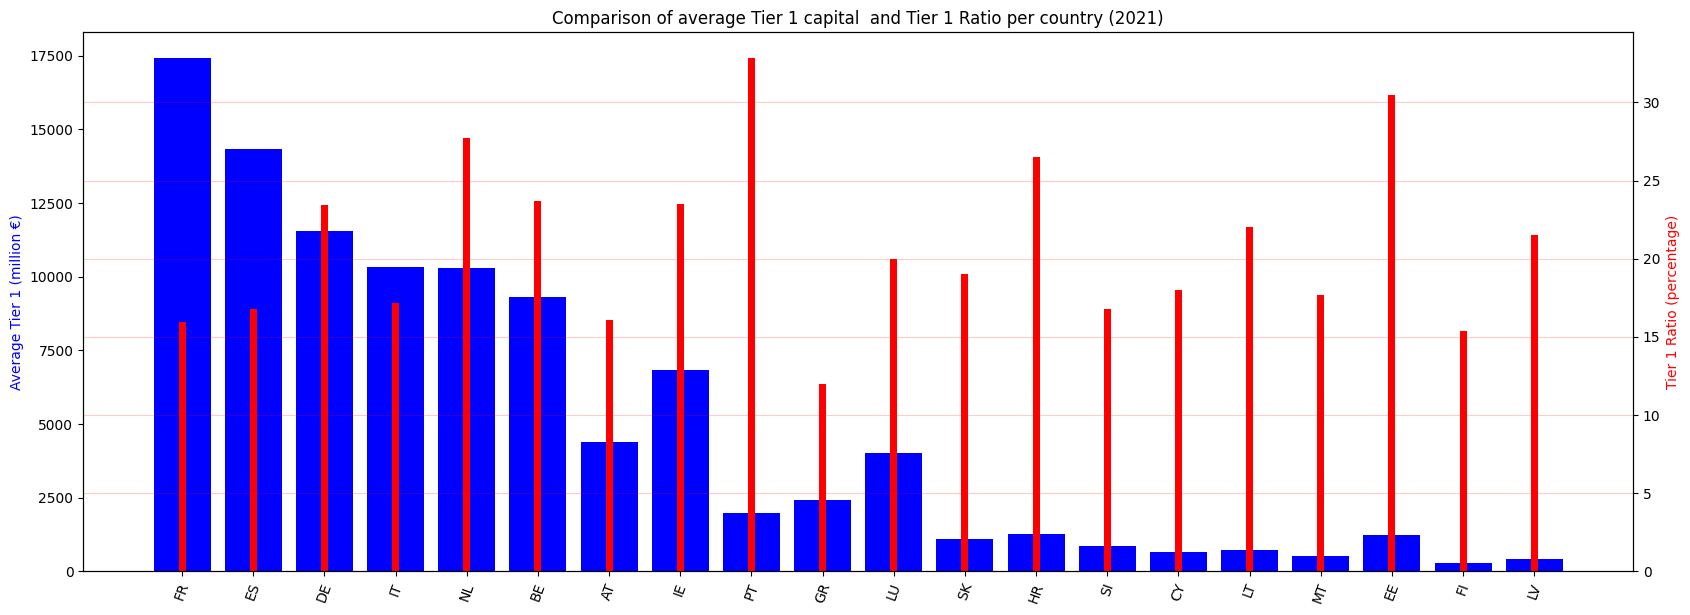

In [53]:
fig, ax = plt.subplots()

plt.gcf().set_size_inches(20, 7)

# Plot the line plot on the axis

ax.bar(avg_tier1_country['Country'], avg_tier1_country['Tier 1 2021'], color = 'blue')

# Create a twin axis object that shares the x-axis with the previous axis
ax2 = ax.twinx()

# Plot the bar plot on the twin axis
ax2.bar(avg_tier1_country['Country'], avg_tier1_country['Tier 1 Ratio (%)\n2021'], color = 'red', width=0.1)

# Customize the plot
ax.set_ylabel('Average Tier 1 (million €)', color='blue')
ax2.set_ylabel('Tier 1 Ratio (percentage)', color='red')
ax2.grid(False)
plt.grid(color = '#FF000044', alpha=0.2)
plt.sca(ax)
plt.xticks(rotation = 70)
plt.title('Comparison of average Tier 1 capital  and Tier 1 Ratio per country (2021)')

# Show the plot
plt.show()

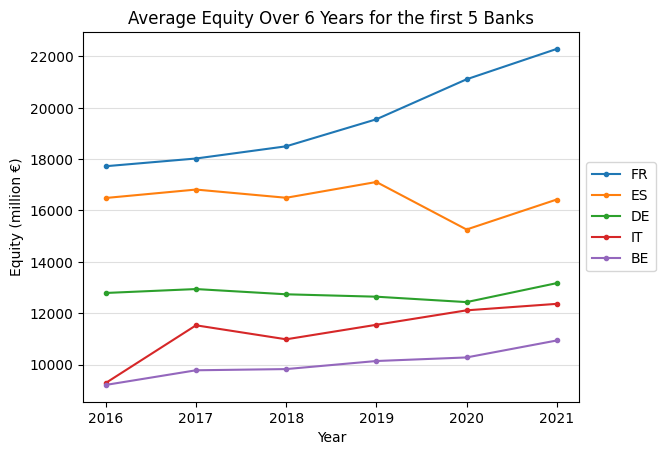

In [54]:
# Average  number of equity evolution for the first 5 EU countries in terms of equity

# Generate some dummy data
years = np.arange(2016, 2022)

# Create a figure and axis object
fig, ax = plt.subplots()

# Set the plot title and axis labels
ax.set_title('Average Equity Over 6 Years for the first 5 Banks')
ax.set_xlabel('Year')
ax.set_ylabel('Equity (million €)')

# Plot the data as line plots
ax.plot(years, avg_equity.iloc[0,1:], marker='.', label=avg_equity.iloc[0, 0])
ax.plot(years, avg_equity.iloc[1,1:], marker='.', label=avg_equity.iloc[1, 0])
ax.plot(years, avg_equity.iloc[2,1:], marker='.', label=avg_equity.iloc[2, 0])
ax.plot(years, avg_equity.iloc[3,1:], marker='.', label=avg_equity.iloc[3, 0])
ax.plot(years, avg_equity.iloc[4,1:], marker='.', label=avg_equity.iloc[4, 0])

# Set the tick labels for the x-axis
ax.set_xticks(years)
ax.set_xticklabels(years)

# Add a legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(alpha=0.4, axis='y')
plt.show()    
     

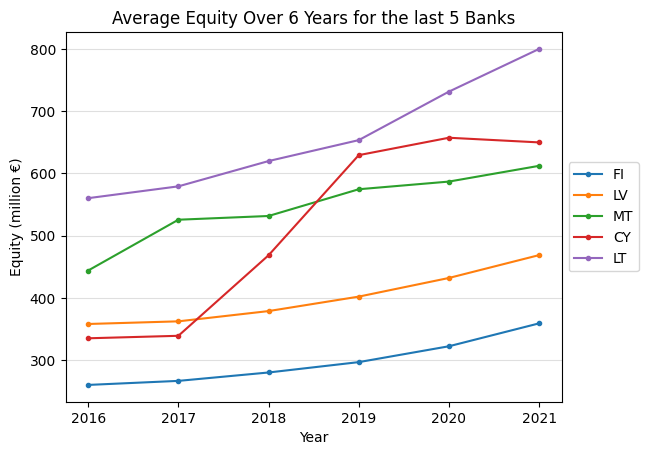

In [55]:
# Average number of equity evolution for the last 5 EU countries in terms of equity

# Generate some dummy data
years = np.arange(2016, 2022)

# Create a figure and axis object
fig, ax = plt.subplots()

# Set the plot title and axis labels
ax.set_title('Average Equity Over 6 Years for the last 5 Banks')
ax.set_xlabel('Year')
ax.set_ylabel('Equity (million €)')

# Plot the data as line plots
ax.plot(years, avg_equity.iloc[-1,1:], marker='.', label=avg_equity.iloc[-1, 0])
ax.plot(years, avg_equity.iloc[-2,1:], marker='.', label=avg_equity.iloc[-2, 0])
ax.plot(years, avg_equity.iloc[-3,1:], marker='.', label=avg_equity.iloc[-3, 0])
ax.plot(years, avg_equity.iloc[-4,1:], marker='.', label=avg_equity.iloc[-4, 0])
ax.plot(years, avg_equity.iloc[-5,1:], marker='.', label=avg_equity.iloc[-5, 0])

# Set the tick labels for the x-axis
ax.set_xticks(years)
ax.set_xticklabels(years)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(alpha=0.4, axis='y')
plt.show()  

In [56]:
avg_assets = pd.DataFrame({"Country" : country_codes})
for year in range(2016,2022):
    list_assets = []
    for country in country_codes:
        list_assets.append(data[data['Country ISO code'] == country]['Total assets ' + str(year)].mean(skipna= True))
    avg_assets[str(year)] = list_assets

avg_assets.sort_values(by='2021', ascending=False, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

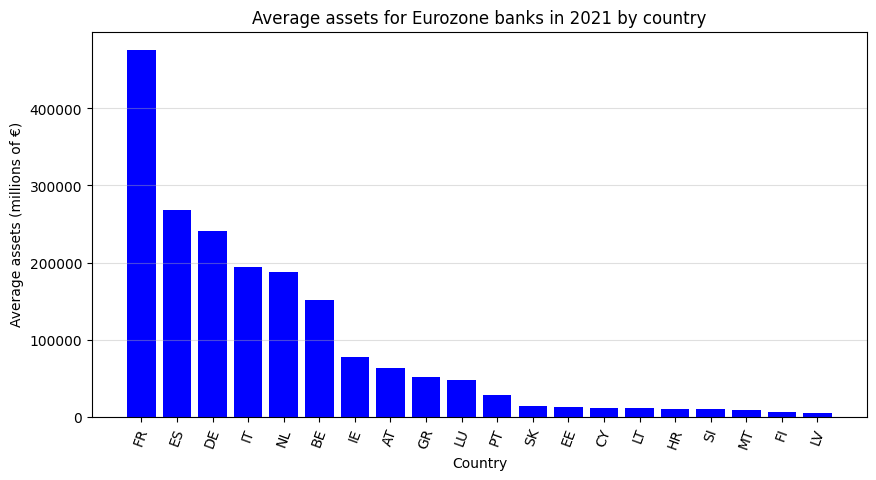

In [57]:
# Average number of assets for EMU COUNTRIES (in 2021)

plt.figure(figsize= (10, 5))
plt.bar(avg_assets['Country'], avg_assets['2021'], color = 'blue')
plt.xlabel("Country")
plt.ylabel("Average assets (millions of €)")
plt.title("Average assets for Eurozone banks in 2021 by country")
plt.xticks(rotation = 70)
plt.grid(alpha=0.4, axis='y')

plt.show

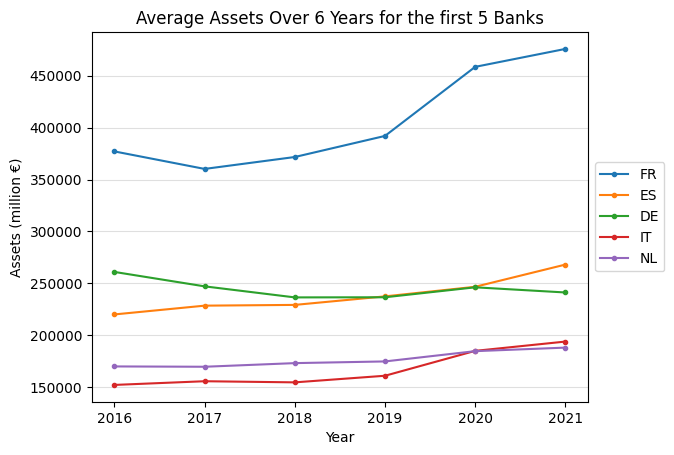

In [58]:
# Average  number of assets evolution for the first 5 EU countries in terms of equity

# Generate some dummy data
years = np.arange(2016, 2022)

# Create a figure and axis object
fig, ax = plt.subplots()

# Set the plot title and axis labels
ax.set_title('Average Assets Over 6 Years for the first 5 Banks')
ax.set_xlabel('Year')
ax.set_ylabel('Assets (million €)')

# Plot the data as line plots
ax.plot(years, avg_assets.iloc[0,1:], marker='.', label=avg_assets.iloc[0, 0])
ax.plot(years, avg_assets.iloc[1,1:], marker='.', label=avg_assets.iloc[1, 0])
ax.plot(years, avg_assets.iloc[2,1:], marker='.', label=avg_assets.iloc[2, 0])
ax.plot(years, avg_assets.iloc[3,1:], marker='.', label=avg_assets.iloc[3, 0])
ax.plot(years, avg_assets.iloc[4,1:], marker='.', label=avg_assets.iloc[4, 0])

# Set the tick labels for the x-axis
ax.set_xticks(years)
ax.set_xticklabels(years)

# Add a legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(alpha=0.4, axis='y')
plt.show()  

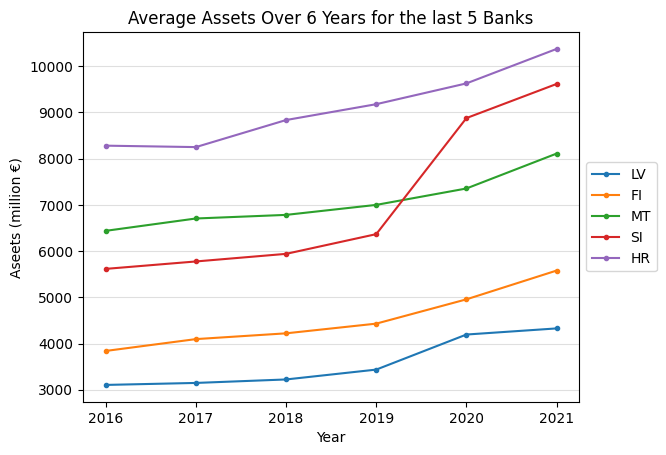

In [59]:
# Average  number of assets evolution for the last 5 EU countries in terms of equity

# Generate some dummy data
years = np.arange(2016, 2022)

# Create a figure and axis object
fig, ax = plt.subplots()

# Set the plot title and axis labels
ax.set_title('Average Assets Over 6 Years for the last 5 Banks')
ax.set_xlabel('Year')
ax.set_ylabel('Aseets (million €)')

# Plot the data as line plots
ax.plot(years, avg_assets.iloc[-1,1:], marker='.', label=avg_assets.iloc[-1, 0])
ax.plot(years, avg_assets.iloc[-2,1:], marker='.', label=avg_assets.iloc[-2, 0])
ax.plot(years, avg_assets.iloc[-3,1:], marker='.', label=avg_assets.iloc[-3, 0])
ax.plot(years, avg_assets.iloc[-4,1:], marker='.', label=avg_assets.iloc[-4, 0])
ax.plot(years, avg_assets.iloc[-5,1:], marker='.', label=avg_assets.iloc[-5, 0])

# Set the tick labels for the x-axis
ax.set_xticks(years)
ax.set_xticklabels(years)

# Add a legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(alpha=0.4, axis='y')
plt.show()

In [60]:
# Average number of equity for specialization. 
mean_equity_comm = []
mean_equity_inv = []
for i in range(2016, 2022):
    mean_equity_comm.append(data[data['Specialisation'] == 'Commercial bank']['Total equity ' + str(i)].mean(skipna= True))
    mean_equity_inv.append(data[data['Specialisation'] == 'Investment bank']['Total equity ' + str(i)].mean(skipna= True))

In [61]:
# Average number of assets for specialization. 
mean_assets_comm = []
mean_assets_inv = []
for i in range(2016, 2022):
    mean_assets_comm.append(data[data['Specialisation'] == 'Commercial bank']['Total assets ' + str(i)].mean(skipna= True))
    mean_assets_inv.append(data[data['Specialisation'] == 'Investment bank']['Total assets ' + str(i)].mean(skipna= True))

In [62]:
avg_ratio = pd.DataFrame()
list_tier1 = []

for i in range(2016,2022):
   list_tier1.append(data['Tier 1 Ratio (%)\n' + str(i)].mean(skipna= True))
avg_ratio['Avg Tier 1 ratio'] = list_tier1

list_leverage = []

for i in range(2016,2022):
   list_leverage.append(data['Leverage ratio ' + str(i)].mean(skipna= True))
avg_ratio['Avg Leverage Ratio'] = list_leverage

list_cet1= []

for i in range(2016,2022):
   list_cet1.append(data['CET1 ratio ' + str(i)].mean(skipna= True))
avg_ratio['Avg CET1 Ratio'] = list_cet1

avg_cet1 = min(avg_ratio['Avg CET1 Ratio'])
avg_lev = min(avg_ratio['Avg Leverage Ratio'])
avg_t1 = min(avg_ratio['Avg Tier 1 ratio'])


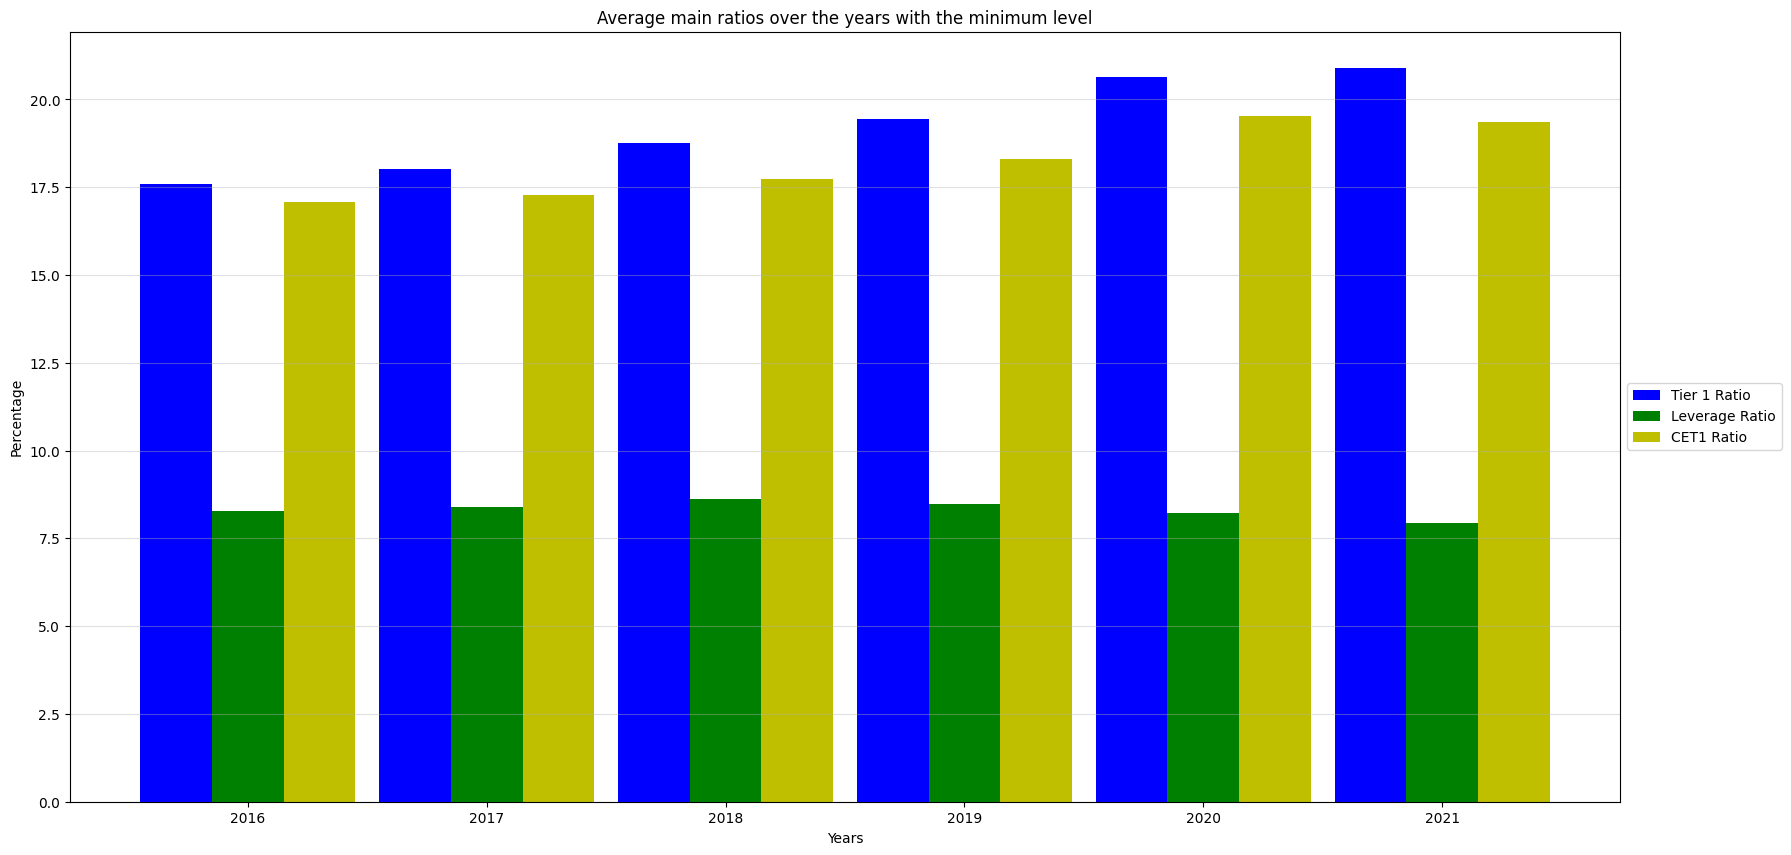

In [63]:
# Set the width of each bar
bar_width = 0.3

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(mean_equity_comm))

# Create the figure and axes objects
fig, ax = plt.subplots()

plt.gcf().set_size_inches(20, 10)

# Plot the bars for category1
ax.bar(x_pos, avg_ratio['Avg Tier 1 ratio'], width=bar_width, color='b', label='Tier 1 Ratio')

# Plot the bars for category2
ax.bar(x_pos + bar_width, avg_ratio['Avg Leverage Ratio'], width=bar_width, color='g', label='Leverage Ratio')

ax.bar(x_pos + bar_width + bar_width, avg_ratio['Avg CET1 Ratio'], width=bar_width, color='y', label='CET1 Ratio')

# Set the x-axis tick labels
ax.set_xticks(x_pos + bar_width * 3 / 3)
ax.set_xticklabels(range(2016, 2022))

# Add a legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set the axis labels
ax.set_xlabel('Years')
ax.set_ylabel('Percentage')

# Set the title of the chart
ax.set_title('Average main ratios over the years with the minimum level')
plt.grid(alpha=0.4, axis='y')

# Show the chart
plt.show()

In [64]:
data_copy = data.copy()
data_copy['Quartile'] = pd.qcut(data_copy['Total assets 2021'], q=4, labels=False)

In [65]:
data_copy.dropna(inplace=True)

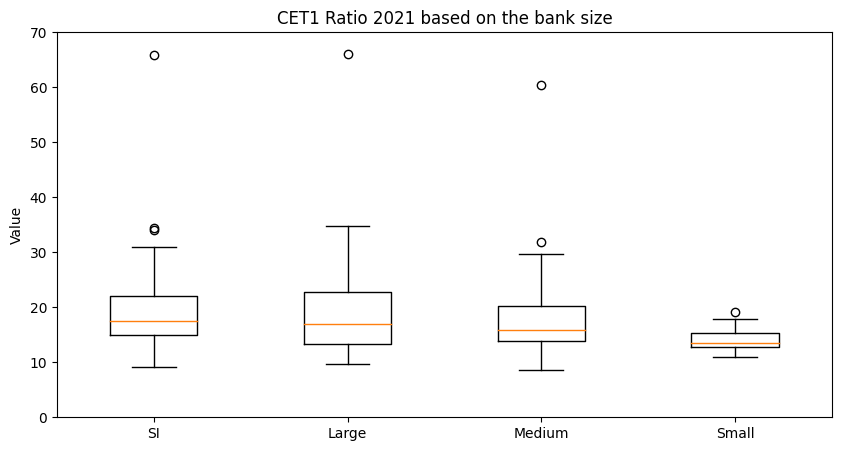

In [66]:
# Combine the data into a list
boxplot = [data_copy[data_copy['Quartile'] == 0]['CET1 ratio 2021'], data_copy[data_copy['Quartile'] == 1]['CET1 ratio 2021'], 
        data_copy[data_copy['Quartile'] == 2]['CET1 ratio 2021'], data_copy[data_copy['Quartile'] == 3]['CET1 ratio 2021']]

# Set the figure size
plt.figure(figsize=(10, 5))

# Create the boxplot
plt.boxplot(boxplot)

# Set the labels for the x-axis and y-axis
plt.xticks([1, 2, 3, 4], ['SI', 'Large', 'Medium', 'Small'])
plt.ylabel('Value')
plt.ylim(0, 70)

# Set the title of the plot
plt.title('CET1 Ratio 2021 based on the bank size')

# Show the plot
plt.show()


In [67]:
for i in range(2016, 2022):
    data_copy['Total Capital Ratio ' + str(i)] = (data_copy['Total equity ' + str(i)] / data_copy['Total Risk Weighted Assets ' + str(i)])*100

data_copy

,Bank name,Quoted,Sifi,Country ISO code,Consolidation code,Specialisation,Last avail. year,Tier 1 2021,Tier 1 2020,Tier 1 2019,Tier 1 2018,Tier 1 2017,Tier 1 2016,Common equity (CET1) 2021,Common equity (CET1) 2020,Common equity (CET1) 2019,Common equity (CET1) 2018,Common equity (CET1) 2017,Common equity (CET1) 2016,Total equity 2021,Total equity 2020,Total equity 2019,Total equity 2018,Total equity 2017,Total equity 2016,RWA intensity 2021,RWA intensity 2020,RWA intensity 2019,RWA intensity 2018,RWA intensity 2017,RWA intensity 2016,Total Risk Weighted Assets 2021,Total Risk Weighted Assets 2020,Total Risk Weighted Assets 2019,Total Risk Weighted Assets 2018,Total Risk Weighted Assets 2017,Total Risk Weighted Assets 2016,Total assets 2021,Total assets 2020,Total assets 2019,Total assets 2018,Total assets 2017,Total assets 2016,Cap adequacy ratio 2021,Cap adequacy ratio 2020,Cap adequacy ratio 2019,Cap adequacy ratio 2018,Cap adequacy ratio 2017,Cap adequacy ratio 2016,Tier 1 Ratio (%)\n2021,Tier 1 Ratio (%)\n2020,Tier 1 Ratio (%)\n2019,Tier 1 Ratio (%)\n2018,Tier 1 Ratio (%)\n2017,Tier 1 Ratio (%)\n2016,Leverage ratio 2021,Leverage ratio 2020,Leverage ratio 2019,Leverage ratio 2018,Leverage ratio 2017,Leverage ratio 2016,CET1 ratio 2021,CET1 ratio 2020,CET1 ratio 2019,CET1 ratio 2018,CET1 ratio 2017,CET1 ratio 2016,Quartile,Total Capital Ratio 2016,Total Capital Ratio 2017,Total Capital Ratio 2018,Total Capital Ratio 2019,Total Capital Ratio 2020,Total Capital Ratio 2021
0,BNP PARIBAS,Yes,Yes,FR,C2,Commercial bank,2022,99668,97772,89962,84773,83766,80944,91389,87732,81204,76131,75741,73562,122507,117349,111845,105726,107209,105220,27.0,28.0,31.0,32.0,33.0,31.0,713671.0,695523.0,668828.0,647001.0,640644.0,638207.0,2634444,2488491,2164713,2040836,1952166,2076959,16.0,16.0,16.0,15.0,15.0,15.0,14.0,14.0,14.0,13.0,13.0,13.0,3.783265,3.928967,4.155840,4.153837,4.290926,3.897236,12.805480,12.613817,12.141238,11.766752,11.822635,11.526354,3,16.486814,16.734567,16.340933,16.722536,16.872052,17.165753
1,BANCO SANTANDER SA,Yes,Yes,ES,C2,Commercial bank,2022,79939,78126,78964,75838,73293,67834,70208,69399,70497,66904,65563,62068,97053,91322,110659,107361,106833,102699,36.0,37.0,40.0,41.0,42.0,44.0,601845.0,562580.0,605244.0,592319.0,605064.0,588088.0,1595835,1508250,1522695,1459271,1444305,1339125,17.0,16.0,15.0,15.0,15.0,15.0,14.0,14.0,13.0,13.0,12.0,12.0,5.009227,5.179910,5.185805,5.196978,5.074621,5.065547,11.665462,12.335846,11.647699,11.295265,10.835713,10.554203,3,17.463203,17.656479,18.125537,18.283370,16.232714,16.125913
3,DEUTSCHE BANK AG,Yes,Yes,DE,C2,Commercial bank,2022,54774,50633,48732,52081,52921,46830,46506,44885,44148,47486,48300,42279,68030,62196,62160,68737,68099,64819,27.0,25.0,25.0,26.0,23.0,22.0,351630.0,328952.0,324015.0,350432.0,343316.0,356235.0,1323993,1325259,1297674,1348137,1474732,1590546,18.0,18.0,17.0,18.0,19.0,17.0,16.0,15.0,15.0,15.0,15.0,13.0,4.137031,3.820612,3.755335,3.863183,3.588516,2.944272,13.225834,13.644848,13.625295,13.550703,14.068671,11.868289,3,18.195573,19.835662,19.614932,19.184297,18.907318,19.347041
4,INTESA SANPAOLO,Yes,No,IT,C2,Commercial bank,2022,51999,56427,43048,37928,43465,39459,45735,48941,38952,33072,38051,35926,64066,66321,56522,54350,56604,49319,31.0,35.0,37.0,35.0,36.0,39.0,326903.0,347072.0,298524.0,276446.0,286825.0,283918.0,1069003,1002614,816570,787790,796861,725138,19.0,20.0,18.0,18.0,18.0,17.0,16.0,16.0,14.0,14.0,15.0,14.0,4.864252,5.627988,5.271808,4.814481,5.454527,5.441585,13.990389,14.101109,13.048197,11.963277,13.266277,12.653654,3,17.370861,19.734681,19.660259,18.933821,19.108715,19.597862
5,ING BANK NV,No,Yes,NL,C2,Commercial bank,2022,51698,48650,49398,45619,45618,45871,44828,42934,42572,40379,40576,39375,48650,48697,47817,44976,44377,44146,33.0,33.0,37.0,35.0,37.0,37.0,312616.0,306016.0,326192.0,313571.0,309287.0,312086.0,951317,937379,891910,887012,846318,843919,20.0,19.0,18.0,17.0,18.0,17.0,17.0,16.0,15.0,15.0,15.0,15.0,5.434361,5.190003,5.538451,5.142997,5.3

In [68]:
cap_ratios = data_copy.groupby(['Country ISO code', 'Specialisation'])[['Total Capital Ratio 2016', 'Total Capital Ratio 2017', 'Total Capital Ratio 2018', 'Total Capital Ratio 2019', 'Total Capital Ratio 2020', 'Total Capital Ratio 2021']].mean()
cap_ratios.dropna(inplace=True)

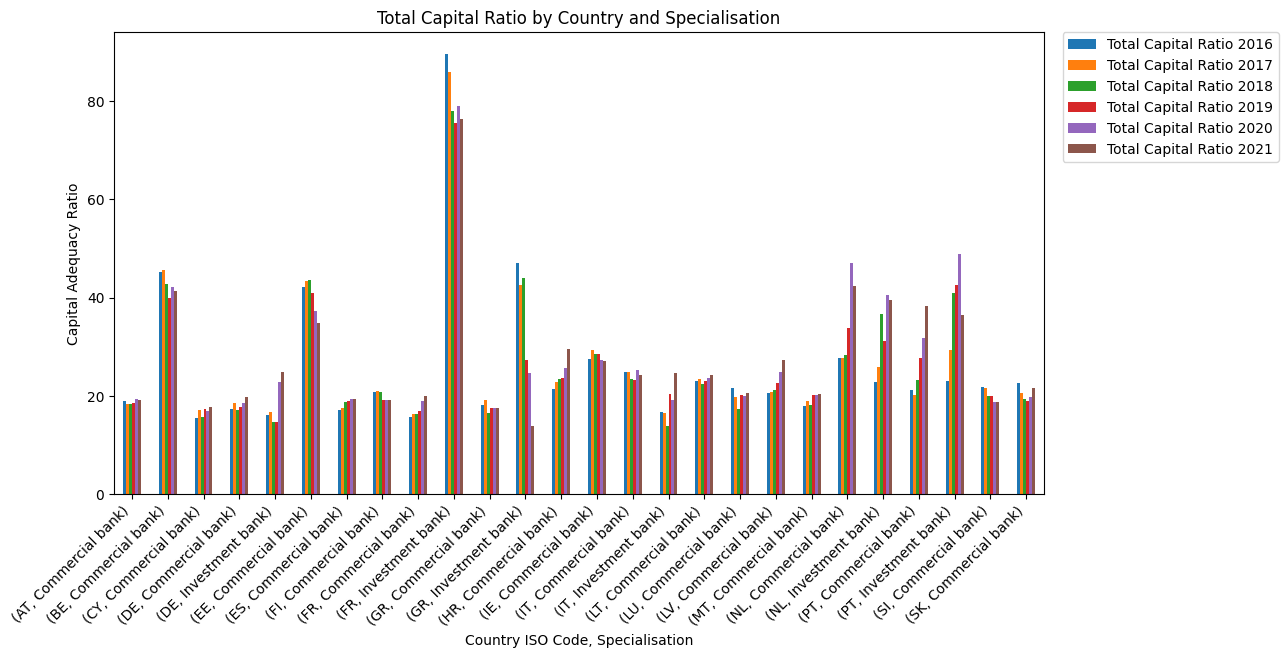

In [69]:
ax = cap_ratios.plot(kind='bar', figsize=(12, 6), title='Total Capital Ratio by Country and Specialisation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('Country ISO Code, Specialisation')
ax.set_ylabel('Capital Adequacy Ratio')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

## Tier 1 and CET1 analysis

### Commercial vs investments

In [70]:
df_commercial = data[data["Specialisation"] == "Commercial bank"]
df_investments = data[data["Specialisation"] == "Investment bank"]

In [71]:
print("Number of commercial banks:", df_commercial.shape[0])
print("Number of investments banks:", df_investments.shape[0])

Number of commercial banks: 118
Number of investments banks: 13


In [72]:
#Usefull for plotting
years = range(2016, 2022)

In [73]:
#Selecting tier 1 columns
df_commercial_tier_1 = df_commercial.iloc[:, 7:13].iloc[:, ::-1]
df_investments_tier_1 = df_investments.iloc[:, 7:13].iloc[:, ::-1]

#Selecting tier 1 ratio columns
df_commercial_tier_1_ratio = df_commercial.iloc[:, 49:55].iloc[:, ::-1]
df_investments_tier_1_ratio = df_investments.iloc[:, 49:55].iloc[:, ::-1]

#Selecting CET1 columns
df_commercial_CET1 = df_commercial.iloc[:, 13:19].iloc[:, ::-1]
df_investments_CET1 = df_investments.iloc[:, 13:19].iloc[:, ::-1]

#Selecting CET1 ratio columns
df_commercial_CET1_ratio = df_commercial.iloc[:, 61:67].iloc[:, ::-1]
df_investments_CET1_ratio = df_investments.iloc[:, 61:67].iloc[:, ::-1]

"""
#Selecting Total RWA columns
df_commercial_RWA = df_commercial.iloc[:, 31:37].iloc[:, ::-1]
df_investments_RWA = df_investments.iloc[:, 31:37].iloc[:, ::-1]
"""

#From percentages to numbers
df_investments_CET1_ratio = df_investments_CET1_ratio / 100
df_commercial_CET1_ratio = df_commercial_CET1_ratio / 100

df_investments_tier_1_ratio = df_investments_tier_1_ratio / 100
df_commercial_tier_1_ratio = df_commercial_tier_1_ratio / 100

### Total Tier 1 and CET1 change

In [74]:
#Total Tier 1 change over time

list_commercial = []
for col in df_commercial_tier_1.columns:
    list_commercial.append(df_commercial_tier_1[col].sum())
print(list_commercial)

list_investments = []
for col in df_investments_tier_1.columns:
    list_investments.append(df_investments_tier_1[col].sum())
print(list_investments)

list_com_CET1 = []
for col in df_commercial_CET1.columns:
    list_com_CET1.append(df_commercial_CET1[col].sum())
print(list_com_CET1)

list_inv_CET1 = []
for col in df_investments_CET1.columns:
    list_inv_CET1.append(df_investments_CET1[col].sum())
print(list_inv_CET1)

list_com_CET1 = np.array(list_com_CET1)
list_inv_CET1 = np.array(list_inv_CET1)
list_commercial = np.array(list_commercial)
list_investments = np.array(list_investments)

[824177, 881696, 866142, 914709, 969824, 997493]
[8949, 7241, 7475, 7187, 7740, 7871]
[763116, 811341, 795657, 839310, 873370, 893671]
[9021, 7265, 7475, 6938, 7490, 7581]


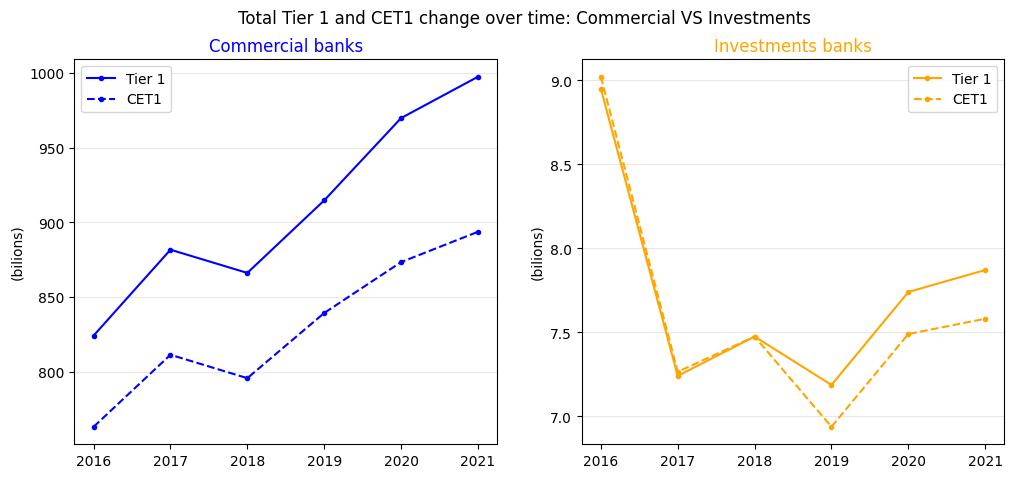

In [75]:
#Plotting

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ax1, ax2 = axs

ax1.plot(years, list_commercial/1000,
         color="blue", label="Tier 1", marker=".")
ax1.plot(years, list_com_CET1/1000,
        color="blue", label="CET1", marker=".", linestyle="--")
ax1.legend()

ax2.plot(years, list_investments/1000,
         color="orange", label="Tier 1", marker=".")
ax2.plot(years, list_inv_CET1/1000,
        color="orange", linestyle="--", label="CET1", marker=".")
ax2.legend()

ax1.set_title("Commercial banks", color="blue")
ax2.set_title("Investments banks", color="orange")
ax1.set_ylabel("(bilions)")
ax2.set_ylabel("(bilions)")
ax1.grid(axis="y", alpha=0.3)
ax2.grid(axis="y", alpha=0.3)
fig.suptitle("Total Tier 1 and CET1 change over time: Commercial VS Investments")
plt.show()

### Average change.

In [76]:
#Mean Tier 1 change over time

list_commercial = []
for col in df_commercial_tier_1.columns:
    list_commercial.append(df_commercial_tier_1[col].mean())
print(list_commercial)

list_investments = []
for col in df_investments_tier_1.columns:
    list_investments.append(df_investments_tier_1[col].mean())
print(list_investments)

list_com_CET1 = []
for col in df_commercial_CET1.columns:
    list_com_CET1.append(df_commercial_CET1[col].mean())
print(list_com_CET1)

list_inv_CET1 = []
for col in df_investments_CET1.columns:
    list_inv_CET1.append(df_investments_CET1[col].mean())
print(list_inv_CET1)

list_commercial = np.array(list_commercial)
list_investments = np.array(list_investments)
list_com_CET1 = np.array(list_com_CET1)
list_inv_CET1 = np.array(list_inv_CET1)

[6984.550847457627, 7472.0, 7340.186440677966, 7751.771186440678, 8218.847457627118, 8453.330508474577]
[688.3846153846154, 557.0, 575.0, 552.8461538461538, 595.3846153846154, 605.4615384615385]
[6467.0847457627115, 6875.771186440678, 6742.85593220339, 7112.796610169492, 7401.440677966101, 7573.483050847458]
[693.9230769230769, 558.8461538461538, 575.0, 533.6923076923077, 576.1538461538462, 583.1538461538462]


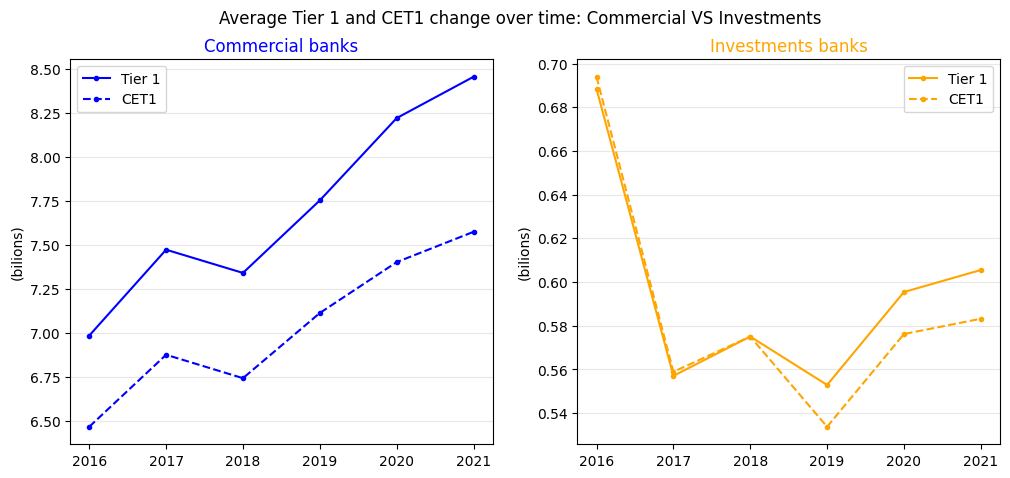

In [77]:
#Plotting

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ax1, ax2 = axs

ax1.plot(years, list_commercial/1000,
         color="blue", label="Tier 1", marker=".")
ax1.plot(years, list_com_CET1/1000,
        color="blue", label="CET1", marker=".", linestyle="--")
ax1.legend()

ax2.plot(years, list_investments/1000,
         color="orange", label="Tier 1", marker=".")
ax2.plot(years, list_inv_CET1/1000,
        color="orange", linestyle="--", label="CET1", marker=".")
ax2.legend()

ax1.set_ylabel("(bilions)")
ax2.set_ylabel("(bilions)")
ax1.set_title("Commercial banks", color="blue")
ax2.set_title("Investments banks", color="orange")

ax1.grid(axis="y", alpha=0.3)
ax2.grid(axis="y", alpha=0.3)
fig.suptitle("Average Tier 1 and CET1 change over time: Commercial VS Investments")
plt.show()

### Change in ratio.

The tier 1 ratio is:
$$
\text{Tier 1 ratio} = \frac{\text{Tier 1}}{\text{Total RWA}}
$$
and, the CET1 ratio is:
$$
\text{CET1 ratio} = \frac{\text{CET1}}{\text{Total RWA}}
$$

From Basilea III, the ratios should be: $\text{Tier 1 ratio}\geq 6\% $ and $\text{CET1 ratio}\geq 4.5\%$.

In [78]:
display(df_investments_tier_1_ratio.head())

,Tier 1 Ratio (%)\n2016,Tier 1 Ratio (%)\n2017,Tier 1 Ratio (%)\n2018,Tier 1 Ratio (%)\n2019,Tier 1 Ratio (%)\n2020,Tier 1 Ratio (%)\n2021
56,0.21,0.25,0.31,0.27,0.35,0.34
71,0.14,0.12,0.12,0.12,0.14,0.17
88,0.12,0.12,0.13,0.13,0.15,0.14
92,0.13,0.14,0.13,0.12,0.13,0.15
112,0.32,0.43,0.32,0.43,0.45,0.34


In [79]:
display(df_investments_CET1_ratio.head())

,CET1 ratio 2016,CET1 ratio 2017,CET1 ratio 2018,CET1 ratio 2019,CET1 ratio 2020,CET1 ratio 2021
56,0.211587,0.248564,0.313899,0.231432,0.305882,0.297216
71,0.116756,0.117868,0.120653,0.119947,0.145005,0.169595
88,0.148696,0.122367,0.131303,0.130374,0.145523,0.141531
92,0.129543,0.136880,0.130159,0.121016,0.132135,0.133565
112,0.315961,0.433653,0.314231,0.431925,0.453071,0.344669


In [80]:
list_investments = []
for col in df_investments_tier_1_ratio.columns:
    list_investments.append(df_investments_tier_1_ratio[col].mean())
print(list_investments)

list_commercial = []
for col in df_commercial_tier_1_ratio.columns:
    list_commercial.append(df_commercial_tier_1_ratio[col].mean())
print(list_commercial)

list_inv_CET1 = []
for col in df_investments_CET1_ratio.columns:
    list_inv_CET1.append(df_investments_CET1_ratio[col].mean())
print(list_inv_CET1)

list_com_CET1 = []
for col in df_commercial_CET1_ratio.columns:
    list_com_CET1.append(df_commercial_CET1_ratio[col].mean())
print(list_com_CET1)


[0.21916666666666665, 0.21333333333333335, 0.2683333333333333, 0.2625, 0.27272727272727276, 0.25363636363636366]
[0.17117117117117117, 0.17672566371681414, 0.17893805309734515, 0.18719298245614038, 0.1999130434782609, 0.20461538461538462]
[0.2198680550866701, 0.21427344451063013, 0.2679308482587283, 0.25937656987780755, 0.25865315339119216, 0.24120875327291924]
[0.16539093578026257, 0.1681941129475219, 0.167356938719003, 0.17454485863735944, 0.18824339702494577, 0.1886119881186679]


C:\Users\david\AppData\Local\Temp\ipykernel_16356\3278236212.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


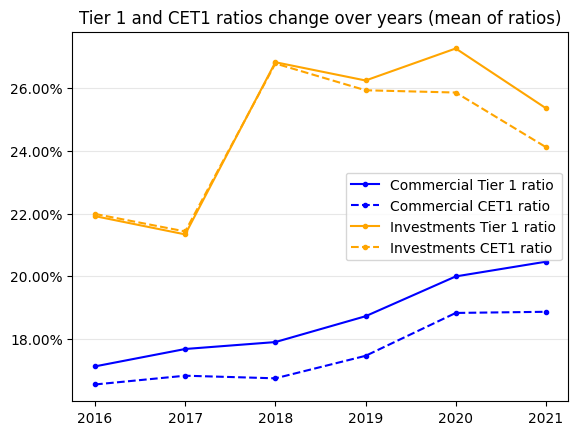

In [81]:
fig, ax = plt.subplots(1, 1)

ax.plot(years, list_commercial,
         color="blue", marker=".", label="Commercial Tier 1 ratio")
ax.plot(years, list_com_CET1,
       color="blue", marker=".", label="Commercial CET1 ratio", linestyle="--")

ax.plot(years, list_investments,
         color="orange", marker=".", label="Investments Tier 1 ratio")
ax.plot(years, list_inv_CET1,
       color="orange", marker=".", label="Investments CET1 ratio", linestyle="--")

#Basilea III standard of 6% for tier 1
#ax.axhline(y=0.06, color="green", linestyle="--") 

ax.grid(axis="y", alpha=0.3)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.legend()
ax.set_title("Tier 1 and CET1 ratios change over years (mean of ratios)")
plt.show()

### Boxplots

In [82]:
#Now lists contain Series
list_investments = []
for col in df_investments_tier_1_ratio.columns:
    list_investments.append(df_investments_tier_1_ratio[col].dropna())

list_commercial = []
for col in df_commercial_tier_1_ratio.columns:
    list_commercial.append(df_commercial_tier_1_ratio[col].dropna())

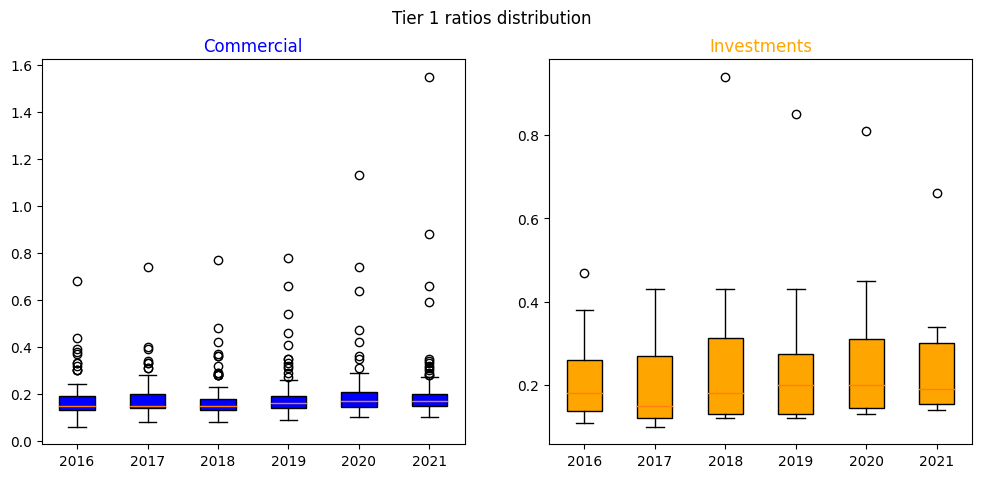

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

bplot2 = ax2.boxplot(list_investments, labels=years, patch_artist=True)
bplot1 = ax1.boxplot(list_commercial, labels=years, patch_artist=True)
for box in bplot1["boxes"]:
    box.set_facecolor("blue")
    
for box in bplot2["boxes"]:
    box.set_facecolor("orange")
ax1.set_title("Commercial", color="blue")
ax2.set_title("Investments", color="orange")
fig.suptitle("Tier 1 ratios distribution")


plt.show()

### Comparison by country (only commercial banks)

In [84]:
col_set_1 = list(country_dict["IT"].iloc[:, 49:55].iloc[:, ::-1].columns)
col_set_2 = list(country_dict["IT"].iloc[:, 61:67].iloc[:, ::-1].columns)
col_set_3 = col_set_1 + col_set_2

In [85]:
country_dict["IT"][col_set_3]

,Tier 1 Ratio (%)\n2016,Tier 1 Ratio (%)\n2017,Tier 1 Ratio (%)\n2018,Tier 1 Ratio (%)\n2019,Tier 1 Ratio (%)\n2020,Tier 1 Ratio (%)\n2021,CET1 ratio 2016,CET1 ratio 2017,CET1 ratio 2018,CET1 ratio 2019,CET1 ratio 2020,CET1 ratio 2021
0,14.0,15.0,14.0,14.0,16.0,16.0,12.653654,13.266277,11.963277,13.048197,14.101109,13.990389
1,9.0,15.0,14.0,15.0,17.0,17.0,8.146233,13.726481,12.075207,13.096816,15.145625,15.004363
2,14.0,14.0,12.0,12.0,16.0,14.0,13.800509,13.680042,11.902895,11.966821,15.754897,13.471251
3,8.0,15.0,14.0,15.0,12.0,11.0,8.169775,14.779651,13.739464,14.720197,12.129531,10.954862
4,12.0,13.0,14.0,14.0,16.0,16.0,12.077160,13.312970,14.245297,13.880371,15.931709,16.145381
5,20.0,22.0,19.0,19.0,20.0,21.0,20.002556,21.907149,19.243097,19.492970,20.397554,20.941990
6,13.0,14.0,13.0,14.0,16.0,14.0,13.146134,13.284596,12.661646,13.526602,NaN,13.703919
7,17.0,19.0,18.0,16.0,18.0,17.0,16.991643,19.352321,17.478814,14.688469,17.080491,16.257739
8,15.0,12.0,11.0,12.0,12.0,15.0,14.801084,11.657855,10.295265,10.938518,11.027814,15.104329
9,14.0,13.0,12.0,12.0,13.0,15.0,13.324873,11.909263,10.933941,11.735420,12.644564,11.594203


In [86]:
#Creating a dictionary:
#Key: country code
#Value: DataFrame of all commercial banks of a country
country_com_dict = dict()
for code in country_codes:
    df = country_dict[code]
    country_com_dict[code] = df[df["Specialisation"] == "Commercial bank"].reset_index(drop=True)

In [87]:
#Creating a new dataframe to save data
list_of_records = []
for code in country_codes:
    df = country_com_dict[code][col_set_3]
    record = df.mean()
    list_of_records.append(record)

df_ratios = pd.DataFrame.from_records(list_of_records, index=country_codes)

In [88]:
df_ratios.insert(0, "Country", country_codes, allow_duplicates=True)

In [89]:
df_ratios

,Country,Tier 1 Ratio (%)\n2016,Tier 1 Ratio (%)\n2017,Tier 1 Ratio (%)\n2018,Tier 1 Ratio (%)\n2019,Tier 1 Ratio (%)\n2020,Tier 1 Ratio (%)\n2021,CET1 ratio 2016,CET1 ratio 2017,CET1 ratio 2018,CET1 ratio 2019,CET1 ratio 2020,CET1 ratio 2021
FR,FR,12.692308,12.769231,14.000000,14.461538,15.214286,15.928571,11.795536,12.091986,12.495905,12.974905,14.051549,14.622349
ES,ES,16.000000,15.636364,16.636364,16.500000,16.416667,16.750000,13.763344,13.513341,14.443635,14.925183,14.671368,14.874139
DE,DE,15.300000,17.600000,16.500000,19.800000,20.300000,24.900000,14.375122,15.966760,14.675686,15.146849,16.260886,16.630386
IT,IT,15.333333,16.583333,15.333333,15.916667,17.500000,17.000000,15.091131,16.034098,14.780817,15.411202,17.118452,16.296189
NL,NL,22.000000,23.285714,23.571429,25.428571,29.857143,26.857143,21.593288,22.622060,20.386198,23.820543,29.644025,27.575560
BE,BE,24.333333,25.833333,26.166667,24.833333,25.666667,23.714286,25.930856,27.408319,30.496249,28.328888,24.865404,23.117641
AT,AT,16.000000,15.454545,15.090909,15.181818,16.181818,16.090909,15.845700,15.029005,14.808351,14.932412,15.508402,15.218386
IE,IE,23.000000,24.500000,23.000000,23.000000,22.000000,23.500000,22.567929,24.341008,22.481017,21.895775,20.836357,22.178054
PT,PT,15.333333,15.888889,19.888889,23.888889,27.444444,31.888889,16.106126,15.740318,18.462008,22.571420,26.288820,30.970018
GR,GR,17.000000,16.500000,12.500000,13.500000,13.000000,11.000000,16.995053,16.728948,12.004480,13.126569,12.721056,9.567009


C:\Users\david\AppData\Local\Temp\ipykernel_16356\2359603973.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


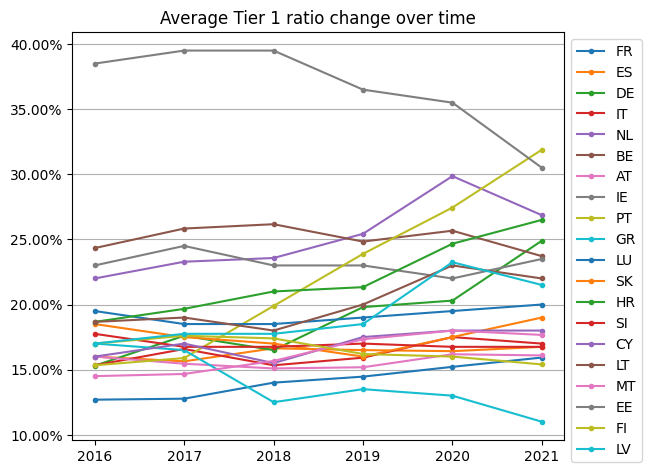

In [90]:
#Plotting Tier 1 ratios
fig, ax = plt.subplots(1, 1, layout='constrained')

for i in range(len(df_ratios["Country"])):
    country = df_ratios["Country"][i]
    x = years
    y = np.array(df_ratios.iloc[i, 1:7])/100
    ax.plot(x, y, label=country, marker=".")
    
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax.grid(axis="y")
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Average Tier 1 ratio change over time")
plt.show()

Looking for the countries with more asssets

In [91]:
total_assets_col = list(data.columns[37:43])

In [92]:
list_of_records = []
for code in country_codes:
    df = country_com_dict[code][total_assets_col]
    record = df.sum()
    list_of_records.append(record)

df_assets = pd.DataFrame.from_records(list_of_records, index=country_codes)

In [93]:
display(df_assets.sort_values(by=["Total assets 2021"], ascending=False))

,Total assets 2021,Total assets 2020,Total assets 2019,Total assets 2018,Total assets 2017,Total assets 2016
FR,7107851,6848600,5855260,5554072,5384041,5641761
ES,3482417,3204919,3084893,2978527,2969232,2859348
DE,3111219,3177653,3053077,3052251,3188047,3366771
IT,2519641,2403565,2091574,2008673,2022546,1975309
NL,1483879,1455591,1383681,1379872,1351075,1351327
BE,1056566,1025471,948570,899651,904868,914738
AT,692987,632102,565316,538715,516328,482556
PT,347780,321510,303929,302723,304729,306360
IE,155817,141610,129221,121079,120309,126316
GR,153145,141600,124689,122887,128225,146376


For our analysis we select the five countries with higher total assets: France, Spain, Germany, Italy, Netherlands and Belgium.

C:\Users\david\AppData\Local\Temp\ipykernel_16356\3284233565.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


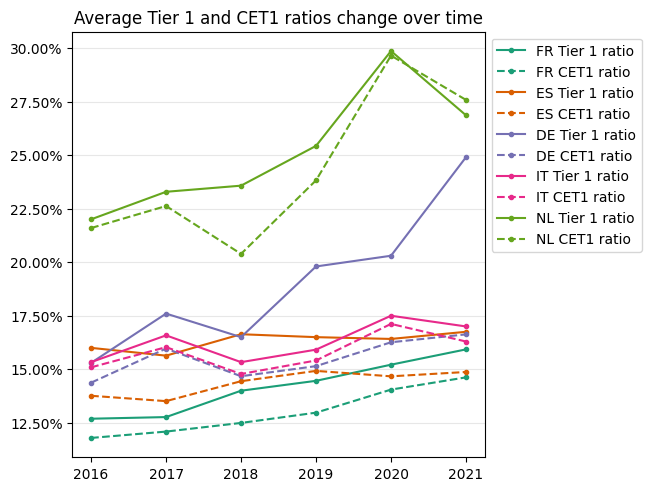

In [94]:
#Plotting Tier 1 ratios
fig, ax = plt.subplots(1, 1, layout='constrained')
colors = plt.colormaps["Dark2"]

for i in range(5):
    country = df_ratios["Country"][i]
    x = years
    y1 = np.array(df_ratios.iloc[i, 1:7])/100
    y2 = np.array(df_ratios.iloc[i, 7:])/100
    label1 = country + " Tier 1 ratio"
    label2 = country + " CET1 ratio"
    ax.plot(x, y1, label=label1, marker=".", color=colors([i]))
    #La seguente riga si può togliere per una maggior chiarezza visiva
    ax.plot(x, y2, label=label2, marker=".", linestyle="--", color=colors([i]))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax.grid(axis="y", alpha=0.3)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Average Tier 1 and CET1 ratios change over time")

plt.show()

## Capital Adequacy Ratio analysis

#### Comparison in terms of capitalization of euro area banks in terms of country, time, specialisations

**Definition of Capital Adequacy Ratio (CAR):**

Also known as capital-to-risk weighted assets ratio (CRAR), it is the ratio of a bank’s capital in relation to its risk weighted assets and current liabilities. It is decided by central banks and bank regulators to prevent commercial banks from taking excess leverage and becoming insolvent in the process. The higher the CAR, the more stable is the bank: in fact, generally, a bank with a high cap adequacy ratio is considered safe, likely to meet its financial obligations and able to withstand unforeseen losses or downturns. Under Basel III, the minimum capital adequacy ratio that banks must maintain is 8%.

It measured as $$\text{Capital Adequacy Ratio} = \frac{\text{Tier I} + \text{Tier II}}{\text{Risk weighted assets}}$$

The risk weighted assets (RWA) take into account credit risk, market risk and operational risk. 

- CAR is critical to ensure that banks have enough cushion to absorb a reasonable amount of losses before they become insolvent.
- Two types of capital are measured with CAR. Tier-1 capital can absorb a reasonable amount of loss without forcing the bank to stop its trading, while tier-2 capital can sustain a loss if there's a liquidation.
- The downside of using CAR is that it doesn't account for the risk of a potential run on the bank, or what would happen in a financial crisis.

In [95]:
df_cap = data.copy()
df_cap.head()

,Bank name,Quoted,Sifi,Country ISO code,Consolidation code,Specialisation,Last avail. year,Tier 1 2021,Tier 1 2020,Tier 1 2019,Tier 1 2018,Tier 1 2017,Tier 1 2016,Common equity (CET1) 2021,Common equity (CET1) 2020,Common equity (CET1) 2019,Common equity (CET1) 2018,Common equity (CET1) 2017,Common equity (CET1) 2016,Total equity 2021,Total equity 2020,Total equity 2019,Total equity 2018,Total equity 2017,Total equity 2016,RWA intensity 2021,RWA intensity 2020,RWA intensity 2019,RWA intensity 2018,RWA intensity 2017,RWA intensity 2016,Total Risk Weighted Assets 2021,Total Risk Weighted Assets 2020,Total Risk Weighted Assets 2019,Total Risk Weighted Assets 2018,Total Risk Weighted Assets 2017,Total Risk Weighted Assets 2016,Total assets 2021,Total assets 2020,Total assets 2019,Total assets 2018,Total assets 2017,Total assets 2016,Cap adequacy ratio 2021,Cap adequacy ratio 2020,Cap adequacy ratio 2019,Cap adequacy ratio 2018,Cap adequacy ratio 2017,Cap adequacy ratio 2016,Tier 1 Ratio (%)\n2021,Tier 1 Ratio (%)\n2020,Tier 1 Ratio (%)\n2019,Tier 1 Ratio (%)\n2018,Tier 1 Ratio (%)\n2017,Tier 1 Ratio (%)\n2016,Leverage ratio 2021,Leverage ratio 2020,Leverage ratio 2019,Leverage ratio 2018,Leverage ratio 2017,Leverage ratio 2016,CET1 ratio 2021,CET1 ratio 2020,CET1 ratio 2019,CET1 ratio 2018,CET1 ratio 2017,CET1 ratio 2016
0,BNP PARIBAS,Yes,Yes,FR,C2,Commercial bank,2022,99668,97772,89962,84773,83766,80944,91389,87732,81204,76131,75741,73562,122507,117349,111845,105726,107209,105220,27.0,28.0,31.0,32.0,33.0,31.0,713671.0,695523.0,668828.0,647001.0,640644.0,638207.0,2634444,2488491,2164713,2040836,1952166,2076959,16.0,16.0,16.0,15.0,15.0,15.0,14.0,14.0,14.0,13.0,13.0,13.0,3.783265,3.928967,4.155840,4.153837,4.290926,3.897236,12.805480,12.613817,12.141238,11.766752,11.822635,11.526354
1,BANCO SANTANDER SA,Yes,Yes,ES,C2,Commercial bank,2022,79939,78126,78964,75838,73293,67834,70208,69399,70497,66904,65563,62068,97053,91322,110659,107361,106833,102699,36.0,37.0,40.0,41.0,42.0,44.0,601845.0,562580.0,605244.0,592319.0,605064.0,588088.0,1595835,1508250,1522695,1459271,1444305,1339125,17.0,16.0,15.0,15.0,15.0,15.0,14.0,14.0,13.0,13.0,12.0,12.0,5.009227,5.179910,5.185805,5.196978,5.074621,5.065547,11.665462,12.335846,11.647699,11.295265,10.835713,10.554203
2,SOCIETE GENERALE,Yes,Yes,FR,C2,Commercial bank,2022,57900,55263,53892,50511,48907,51548,49800,46374,45764,41154,40227,40937,70863,67012,68570,65809,64037,65706,25.0,24.0,25.0,29.0,28.0,26.0,363400.0,351852.0,345010.0,376049.0,353306.0,NaN,1464449,1444404,1356495,1309428,1275128,1354422,19.0,19.0,NaN,NaN,17.0,18.0,16.0,16.0,16.0,13.0,14.0,15.0,3.953705,3.826007,3.972886,3.857486,3.835458,3.805904,13.703908,13.179973,13.264543,10.943787,11.385881,NaN
3,DEUTSCHE BANK AG,Yes,Yes,DE,C2,Commercial bank,2022,54774,50633,48732,52081,52921,46830,46506,44885,44148,47486,48300,42279,68030,62196,62160,68737,68099,64819,27.0,25.0,25.0,26.0,23.0,22.0,351630.0,328952.0,324015.0,350432.0,343316.0,356235.0,1323993,1325259,1297674,1348137,1474732,1590546,18.0,18.0,17.0,18.0,19.0,17.0,16.0,15.0,15.0,15.0,15.0,13.0,4.137031,3.820612,3.755335,3.863183,3.588516,2.944272,13.225834,13.644848,13.625295,13.550703,14.068671,11.868289
4,INTESA SANPAOLO,Yes,No,IT,C2,Commercial bank,2022,51999,56427,43048,37928,43465,39459,45735,48941,38952,33072,38051,35926,64066,66321,56522,54350,56604,49319,31.0,35.0,37.0,35.0,36.0,39.0,326903.0,347072.0,298524.0,276446.0,286825.0,283918.0,1069003,1002614,816570,787790,796861,725138,19.0,20.0,18.0,18.0,18.0,17.0,16.0,16.0,14.0,14.0,15.0,14.0,4.864252,5.627988,5.271808,4.814481,5.454527,5.441585,13.990389,14.101109,13.048197,11.963277,13.266277,12.653654


In [96]:
df_cap['Country ISO code'] = df_cap['Country ISO code'].replace({'FR': 'France', 'ES': 'Spain', 'DE': 'Germany', 'IT': 'Italy', 'NL': 'Netherlands', 'BE': 'Belgium', 
                       'AT': 'Austria', 'IE': 'Ireland', 'PT': 'Portugal', 'GR': 'Greece', 'LU': 'Luxembourg', 'SK': 'Slovakia', 
                       'HR': 'Croatia', 'SI': 'Slovenia', 'CY': 'Cyprus', 'LT': 'Lithuania', 'MT': 'Malta', 'EE': 'Estonia', 'FI': 'Finland', 'LV': 'Latvia'})
df_cap.head()

,Bank name,Quoted,Sifi,Country ISO code,Consolidation code,Specialisation,Last avail. year,Tier 1 2021,Tier 1 2020,Tier 1 2019,Tier 1 2018,Tier 1 2017,Tier 1 2016,Common equity (CET1) 2021,Common equity (CET1) 2020,Common equity (CET1) 2019,Common equity (CET1) 2018,Common equity (CET1) 2017,Common equity (CET1) 2016,Total equity 2021,Total equity 2020,Total equity 2019,Total equity 2018,Total equity 2017,Total equity 2016,RWA intensity 2021,RWA intensity 2020,RWA intensity 2019,RWA intensity 2018,RWA intensity 2017,RWA intensity 2016,Total Risk Weighted Assets 2021,Total Risk Weighted Assets 2020,Total Risk Weighted Assets 2019,Total Risk Weighted Assets 2018,Total Risk Weighted Assets 2017,Total Risk Weighted Assets 2016,Total assets 2021,Total assets 2020,Total assets 2019,Total assets 2018,Total assets 2017,Total assets 2016,Cap adequacy ratio 2021,Cap adequacy ratio 2020,Cap adequacy ratio 2019,Cap adequacy ratio 2018,Cap adequacy ratio 2017,Cap adequacy ratio 2016,Tier 1 Ratio (%)\n2021,Tier 1 Ratio (%)\n2020,Tier 1 Ratio (%)\n2019,Tier 1 Ratio (%)\n2018,Tier 1 Ratio (%)\n2017,Tier 1 Ratio (%)\n2016,Leverage ratio 2021,Leverage ratio 2020,Leverage ratio 2019,Leverage ratio 2018,Leverage ratio 2017,Leverage ratio 2016,CET1 ratio 2021,CET1 ratio 2020,CET1 ratio 2019,CET1 ratio 2018,CET1 ratio 2017,CET1 ratio 2016
0,BNP PARIBAS,Yes,Yes,France,C2,Commercial bank,2022,99668,97772,89962,84773,83766,80944,91389,87732,81204,76131,75741,73562,122507,117349,111845,105726,107209,105220,27.0,28.0,31.0,32.0,33.0,31.0,713671.0,695523.0,668828.0,647001.0,640644.0,638207.0,2634444,2488491,2164713,2040836,1952166,2076959,16.0,16.0,16.0,15.0,15.0,15.0,14.0,14.0,14.0,13.0,13.0,13.0,3.783265,3.928967,4.155840,4.153837,4.290926,3.897236,12.805480,12.613817,12.141238,11.766752,11.822635,11.526354
1,BANCO SANTANDER SA,Yes,Yes,Spain,C2,Commercial bank,2022,79939,78126,78964,75838,73293,67834,70208,69399,70497,66904,65563,62068,97053,91322,110659,107361,106833,102699,36.0,37.0,40.0,41.0,42.0,44.0,601845.0,562580.0,605244.0,592319.0,605064.0,588088.0,1595835,1508250,1522695,1459271,1444305,1339125,17.0,16.0,15.0,15.0,15.0,15.0,14.0,14.0,13.0,13.0,12.0,12.0,5.009227,5.179910,5.185805,5.196978,5.074621,5.065547,11.665462,12.335846,11.647699,11.295265,10.835713,10.554203
2,SOCIETE GENERALE,Yes,Yes,France,C2,Commercial bank,2022,57900,55263,53892,50511,48907,51548,49800,46374,45764,41154,40227,40937,70863,67012,68570,65809,64037,65706,25.0,24.0,25.0,29.0,28.0,26.0,363400.0,351852.0,345010.0,376049.0,353306.0,NaN,1464449,1444404,1356495,1309428,1275128,1354422,19.0,19.0,NaN,NaN,17.0,18.0,16.0,16.0,16.0,13.0,14.0,15.0,3.953705,3.826007,3.972886,3.857486,3.835458,3.805904,13.703908,13.179973,13.264543,10.943787,11.385881,NaN
3,DEUTSCHE BANK AG,Yes,Yes,Germany,C2,Commercial bank,2022,54774,50633,48732,52081,52921,46830,46506,44885,44148,47486,48300,42279,68030,62196,62160,68737,68099,64819,27.0,25.0,25.0,26.0,23.0,22.0,351630.0,328952.0,324015.0,350432.0,343316.0,356235.0,1323993,1325259,1297674,1348137,1474732,1590546,18.0,18.0,17.0,18.0,19.0,17.0,16.0,15.0,15.0,15.0,15.0,13.0,4.137031,3.820612,3.755335,3.863183,3.588516,2.944272,13.225834,13.644848,13.625295,13.550703,14.068671,11.868289
4,INTESA SANPAOLO,Yes,No,Italy,C2,Commercial bank,2022,51999,56427,43048,37928,43465,39459,45735,48941,38952,33072,38051,35926,64066,66321,56522,54350,56604,49319,31.0,35.0,37.0,35.0,36.0,39.0,326903.0,347072.0,298524.0,276446.0,286825.0,283918.0,1069003,1002614,816570,787790,796861,725138,19.0,20.0,18.0,18.0,18.0,17.0,16.0,16.0,14.0,14.0,15.0,14.0,4.864252,5.627988,5.271808,4.814481,5.454527,5.441585,13.990389,14.101109,13.048197,11.963277,13.266277,12.653654


In [97]:
cap_ratios = df_cap.groupby(['Country ISO code', 'Specialisation'])[['Cap adequacy ratio 2016', 'Cap adequacy ratio 2017', 'Cap adequacy ratio 2018', 'Cap adequacy ratio 2019', 'Cap adequacy ratio 2020', 'Cap adequacy ratio 2021']].mean().rename(index={'Commercial bank': 'CB', 'Investment bank': 'IB'}, level=1)
cap_ratios

Cap adequacy ratio 2016  \
Country ISO code Specialisation                            
Austria          CB                            19.000000   
Belgium          CB                            26.666667   
Croatia          CB                            22.000000   
Cyprus           CB                            16.000000   
Estonia          CB                            38.500000   
Finland          CB                            18.600000   
                 IB                            15.000000   
France           CB                            14.571429   
                 IB                            38.000000   
Germany          CB                            19.900000   
                 IB                            15.000000   
Greece           CB                            17.000000   
                 IB                            47.000000   
Ireland          CB                            27.500000   
Italy            CB                            16.666667   
                 IB                            11.000000   
Latvia           CB                            19.000000   
Lithuania        CB                            19.666667   
Luxembourg       CB                            20.500000   
Malta            CB                            16.000000   
Netherlands      CB                            24.600000   
                 IB                            24.000000   
Portugal         CB                            16.777778   
                 IB                            23.000000   
Slovakia         CB                            19.500000   
Slovenia         CB                            17.750000   
Spain            CB                            18.000000   
                 IB                            16.000000   

                                 Cap adequacy ratio 2017  \
Country ISO code Specialisation                            
Austria          CB                            18.090909   
Belgium          CB                            28.333333   
Croatia          CB                            22.250000   
Cyprus           CB                            17.500000   
Estonia          CB                            39.500000   
Finland          CB                            19.400000   
                 IB                            15.000000   
France           CB                            15.071429   
                 IB                            15.000000   
Germany          CB                            22.500000   
                 IB                            16.333333   
Greece           CB                            16.500000   
                 IB                            42.000000   
Ireland          CB                            28.500000   
Italy            CB                            18.416667   
                 IB                            11.000000   
Latvia           CB                            19.250000   
Lithuania        CB                            19.666667   
Luxembourg       CB                            16.000000   
Malta            CB                            16.000000   
Netherlands      CB                            26.000000   
                 IB                            26.000000   
Portugal         CB                            17.555556   
                 IB                            28.500000   
Slovakia         CB                            18.000000   
Slovenia         CB                            16.750000   
Spain            CB                            17.500000   
                 IB                            18.000000   

                                 Cap adequacy ratio 2018  \
Country ISO code Specialisation                            
Austria          CB                            17.909091   
Belgium          CB                            30.600000   
Croatia          CB                            22.250000   
Cyprus           CB                            16.500000   
Estonia          CB                            39.500000   
Finland    

In [98]:
cap_ratios.sort_values(by=['Cap adequacy ratio 2016'], ascending=False)

Cap adequacy ratio 2016  \
Country ISO code Specialisation                            
Greece           IB                            47.000000   
Estonia          CB                            38.500000   
France           IB                            38.000000   
Ireland          CB                            27.500000   
Belgium          CB                            26.666667   
Netherlands      CB                            24.600000   
                 IB                            24.000000   
Portugal         IB                            23.000000   
Croatia          CB                            22.000000   
Luxembourg       CB                            20.500000   
Germany          CB                            19.900000   
Lithuania        CB                            19.666667   
Slovakia         CB                            19.500000   
Latvia           CB                            19.000000   
Austria          CB                            19.000000   
Finland          CB                            18.600000   
Spain            CB                            18.000000   
Slovenia         CB                            17.750000   
Greece           CB                            17.000000   
Portugal         CB                            16.777778   
Italy            CB                            16.666667   
Malta            CB                            16.000000   
Cyprus           CB                            16.000000   
Spain            IB                            16.000000   
Germany          IB                            15.000000   
Finland          IB                            15.000000   
France           CB                            14.571429   
Italy            IB                            11.000000   

                                 Cap adequacy ratio 2017  \
Country ISO code Specialisation                            
Greece           IB                            42.000000   
Estonia          CB                            39.500000   
France           IB                            15.000000   
Ireland          CB                            28.500000   
Belgium          CB                            28.333333   
Netherlands      CB                            26.000000   
                 IB                            26.000000   
Portugal         IB                            28.500000   
Croatia          CB                            22.250000   
Luxembourg       CB                            16.000000   
Germany          CB                            22.500000   
Lithuania        CB                            19.666667   
Slovakia         CB                            18.000000   
Latvia           CB                            19.250000   
Austria          CB                            18.090909   
Finland          CB                            19.400000   
Spain            CB                            17.500000   
Slovenia         CB                            16.750000   
Greece           CB                            16.500000   
Portugal         CB                            17.555556   
Italy            CB                            18.416667   
Malta            CB                            16.000000   
Cyprus           CB                            17.500000   
Spain            IB                            18.000000   
Germany          IB                            16.333333   
Finland          IB                            15.000000   
France           CB                            15.071429   
Italy            IB                            11.000000   

                                 Cap adequacy ratio 2018  \
Country ISO code Specialisation                            
Greece           IB                            43.000000   
Estonia          CB                            39.500000   
France           IB                            16.000000   
Ireland          CB                            26.000000   
Belgium          CB                            30.600000   
Netherlands

In [99]:
cap_ratios.sort_values(by=['Cap adequacy ratio 2021'], ascending=False)

Cap adequacy ratio 2016  \
Country ISO code Specialisation                            
Netherlands      IB                            24.000000   
Portugal         IB                            23.000000   
                 CB                            16.777778   
Estonia          CB                            38.500000   
Netherlands      CB                            24.600000   
Germany          CB                            19.900000   
Italy            IB                            11.000000   
Croatia          CB                            22.000000   
Ireland          CB                            27.500000   
Belgium          CB                            26.666667   
Latvia           CB                            19.000000   
Lithuania        CB                            19.666667   
Germany          IB                            15.000000   
Malta            CB                            16.000000   
Luxembourg       CB                            20.500000   
Slovakia         CB                            19.500000   
Cyprus           CB                            16.000000   
Italy            CB                            16.666667   
France           CB                            14.571429   
Austria          CB                            19.000000   
Spain            CB                            18.000000   
France           IB                            38.000000   
Slovenia         CB                            17.750000   
Finland          CB                            18.600000   
Greece           CB                            17.000000   
Finland          IB                            15.000000   
Spain            IB                            16.000000   
Greece           IB                            47.000000   

                                 Cap adequacy ratio 2017  \
Country ISO code Specialisation                            
Netherlands      IB                            26.000000   
Portugal         IB                            28.500000   
                 CB                            17.555556   
Estonia          CB                            39.500000   
Netherlands      CB                            26.000000   
Germany          CB                            22.500000   
Italy            IB                            11.000000   
Croatia          CB                            22.250000   
Ireland          CB                            28.500000   
Belgium          CB                            28.333333   
Latvia           CB                            19.250000   
Lithuania        CB                            19.666667   
Germany          IB                            16.333333   
Malta            CB                            16.000000   
Luxembourg       CB                            16.000000   
Slovakia         CB                            18.000000   
Cyprus           CB                            17.500000   
Italy            CB                            18.416667   
France           CB                            15.071429   
Austria          CB                            18.090909   
Spain            CB                            17.500000   
France           IB                            15.000000   
Slovenia         CB                            16.750000   
Finland          CB                            19.400000   
Greece           CB                            16.500000   
Finland          IB                            15.000000   
Spain            IB                            18.000000   
Greece           IB                            42.000000   

                                 Cap adequacy ratio 2018  \
Country ISO code Specialisation                            
Netherlands      IB                            33.000000   
Portugal         IB                            40.000000   
                 CB                            21.222222   
Estonia          CB                            39.500000   
Netherlands      CB                            24.333333   
Germany    

We note that all banks (IB or CB) in all countries respected the minimum limit of 8% CAR, from 2016 to 2021.

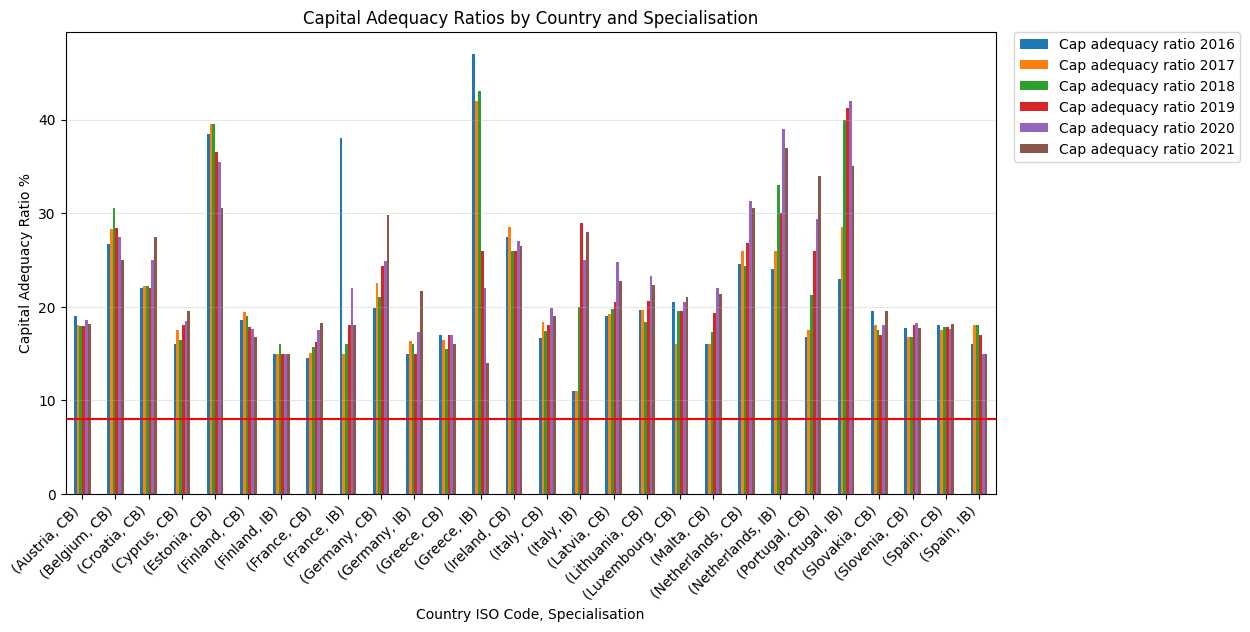

In [100]:

ax = cap_ratios.plot(kind='bar', figsize=(12, 6), title='Capital Adequacy Ratios by Country and Specialisation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('Country ISO Code, Specialisation')
ax.set_ylabel('Capital Adequacy Ratio %')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid(axis="y", alpha=0.3)
plt.axhline(y=8, color='red', linestyle='-')
plt.show()

As we already know, only 8/20 countries present both commercial and investment banks. From the plot above we note that we can't extract some useful information in terms of trend nor any relationship between commercial and investment banks: they all behave in different ways over the years. Some countries did mantain a stable CAR during the period of interest, and others, like Italy ,Portugal and the Netherlands, became much more stable even with the Covid 19 pandemic. 

Only few of them, like Estonia, Finland and Greece (IB), did suffer from a gradual decrease of the CAR ratio over the years: several factors can cause this but overall, a decrease in the CAR ratio can indicate that a country is importing more than it is exporting, which can have negative effects on its economy, such as increased debt, reduced foreign investments, and inflation. The most interesting banks are the investment ones in Greece and France: probably the IBs in Greece were pressured by the debt crisis and the unstable financial situation that charcaterizes the country since 2008. On the other side, french banks were maybe affected by Brexit: in 2016 French companies incured up to €3.2 billion in export losses, but the trend seems to have stopped (as we can see from the other years).

In [101]:
# mean cap adequacy ratio for each country and year
# mean_cap_ratio = df_cap.groupby(['Country ISO code']).mean().filter(regex='Cap adequacy ratio') not corect since it begins from 2021 ang goe to 2016
mean_cap_ratio = df_cap.groupby(['Country ISO code'])[['Cap adequacy ratio 2016', 'Cap adequacy ratio 2017', 'Cap adequacy ratio 2018', 'Cap adequacy ratio 2019', 'Cap adequacy ratio 2020', 'Cap adequacy ratio 2021']].mean()
mean_cap_ratio.head()

,Cap adequacy ratio 2016,Cap adequacy ratio 2017,Cap adequacy ratio 2018,Cap adequacy ratio 2019,Cap adequacy ratio 2020,Cap adequacy ratio 2021
Country ISO code,,,,,,
Austria,19.000000,18.090909,17.909091,17.909091,18.636364,18.181818
Belgium,26.666667,28.333333,30.600000,28.400000,27.500000,25.000000
Croatia,22.000000,22.250000,22.250000,22.000000,25.000000,27.500000
Cyprus,16.000000,17.500000,16.500000,18.000000,18.500000,19.500000
Estonia,38.500000,39.500000,39.500000,36.500000,35.500000,30.500000


In [102]:
mean_cap_ratio.sort_values('Cap adequacy ratio 2021').tail(7)

,Cap adequacy ratio 2016,Cap adequacy ratio 2017,Cap adequacy ratio 2018,Cap adequacy ratio 2019,Cap adequacy ratio 2020,Cap adequacy ratio 2021
Country ISO code,,,,,,
Belgium,26.666667,28.333333,30.600000,28.400000,27.500000,25.000000
Ireland,27.500000,28.500000,26.000000,26.000000,27.000000,26.500000
Croatia,22.000000,22.250000,22.250000,22.000000,25.000000,27.500000
Germany,18.769231,21.076923,19.846154,22.230769,23.153846,27.923077
Estonia,38.500000,39.500000,39.500000,36.500000,35.500000,30.500000
Netherlands,24.500000,26.000000,25.571429,27.285714,32.428571,31.428571
Portugal,18.692308,20.923077,27.000000,30.692308,33.230769,34.307692


<Figure size 1000x500 with 0 Axes>

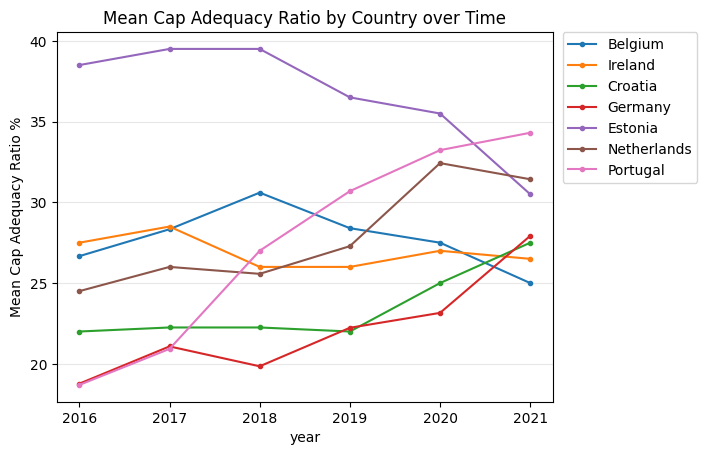

In [103]:
# mean highest CAR for countries over time
plt.figure(figsize= (10, 5))
mean_cap_ratio.transpose()[['Belgium', 'Ireland', 'Croatia', 'Germany','Estonia','Netherlands','Portugal']].plot(kind='line', marker='.')
plt.xlabel('year')
plt.ylabel('Mean Cap Adequacy Ratio %')
plt.title('Mean Cap Adequacy Ratio by Country over Time')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(range(0, 6), range(2016,2022))
plt.grid(axis="y", alpha=0.3)
plt.show()

In [104]:
mean_cap_ratio.sort_values('Cap adequacy ratio 2021').head(7)

,Cap adequacy ratio 2016,Cap adequacy ratio 2017,Cap adequacy ratio 2018,Cap adequacy ratio 2019,Cap adequacy ratio 2020,Cap adequacy ratio 2021
Country ISO code,,,,,,
Greece,27.000000,25.000000,24.666667,20.000000,18.666667,15.333333
Finland,18.000000,18.666667,18.500000,17.333333,17.166667,16.500000
Slovenia,17.750000,16.750000,16.750000,18.000000,18.250000,17.750000
Spain,17.846154,17.538462,17.846154,17.769231,17.461538,17.923077
Austria,19.000000,18.090909,17.909091,17.909091,18.636364,18.181818
France,16.133333,15.066667,15.769231,16.384615,17.857143,18.214286
Cyprus,16.000000,17.500000,16.500000,18.000000,18.500000,19.500000


<Figure size 1000x500 with 0 Axes>

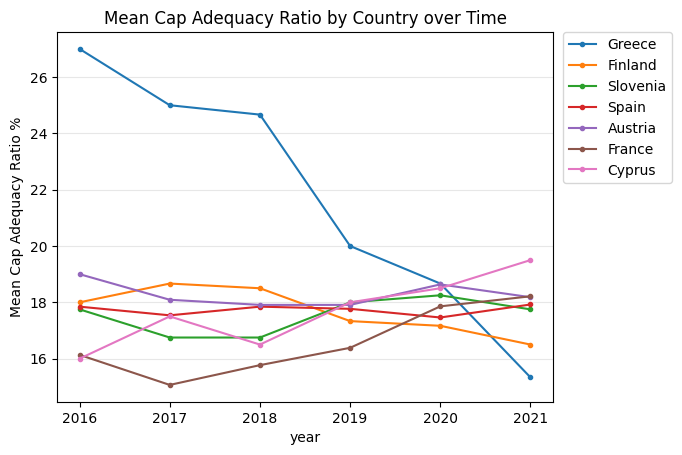

In [105]:
# mean lowest CAR for countries over time
plt.figure(figsize= (10, 5))
mean_cap_ratio.transpose()[['Greece','Finland','Slovenia','Spain','Austria','France','Cyprus']].plot(kind='line', marker='.')
plt.xlabel('year')
plt.ylabel('Mean Cap Adequacy Ratio %')
plt.title('Mean Cap Adequacy Ratio by Country over Time')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(range(0, 6), range(2016,2022))
plt.grid(axis="y", alpha=0.3)
plt.show()

In [106]:
# mean cap adequacy ratio for each specialisation
mean_cap_ratio_specialisation = df_cap.groupby(['Specialisation'])[['Cap adequacy ratio 2016', 'Cap adequacy ratio 2017', 'Cap adequacy ratio 2018', 'Cap adequacy ratio 2019', 'Cap adequacy ratio 2020', 'Cap adequacy ratio 2021']].mean()
mean_cap_ratio_specialisation

,Cap adequacy ratio 2016,Cap adequacy ratio 2017,Cap adequacy ratio 2018,Cap adequacy ratio 2019,Cap adequacy ratio 2020,Cap adequacy ratio 2021
Specialisation,,,,,,
Commercial bank,19.078947,19.730435,19.776786,20.741071,22.087719,22.591304
Investment bank,22.153846,22.307692,27.230769,26.538462,27.538462,25.538462


<Figure size 1000x500 with 0 Axes>

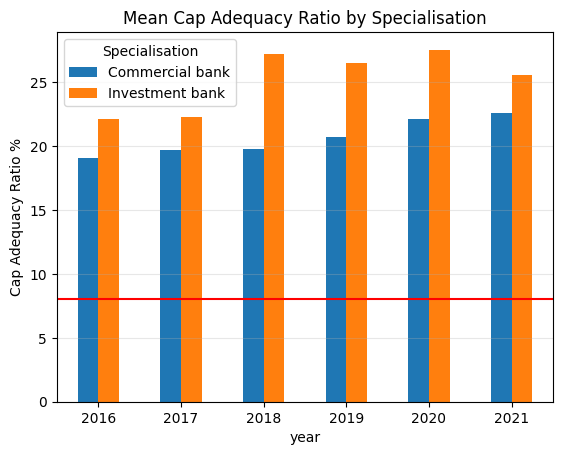

In [107]:
plt.figure(figsize= (10, 5))
mean_cap_ratio_specialisation.transpose().plot(kind='bar')
plt.xlabel('year')
plt.ylabel('Cap Adequacy Ratio %')
plt.title('Mean Cap Adequacy Ratio by Specialisation')
plt.xticks(range(0, 6), range(2016,2022), rotation=0)   # rotation argument to rotate the xlabels
plt.grid(axis="y", alpha=0.3)
plt.axhline(y=8, color='red', linestyle='-')
plt.show()

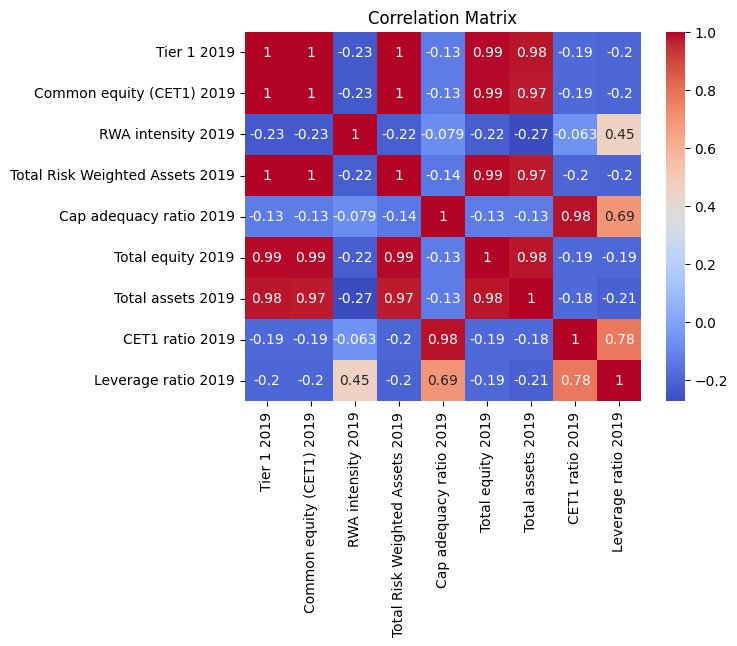

In [108]:
# Correlation matrix between interesting features: cap adequacy ratio, equity, assets, CET1 ratio, and leverage ratio
# Only exploratory
corr_matrix = df_cap[['Tier 1 2019', 'Common equity (CET1) 2019', 'RWA intensity 2019', 'Total Risk Weighted Assets 2019', 'Cap adequacy ratio 2019', 'Total equity 2019', 'Total assets 2019', 'CET1 ratio 2019', 'Leverage ratio 2019']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**CAR vs. Tier-1 Leverage Ratio**

A related capital adequacy ratio sometimes considered is the tier-1 leverage ratio. The tier-1 leverage ratio is the relationship between a bank's core capital and its total assets. It is calculated by dividing Tier-1 capital by a bank's average total consolidated assets and certain off-balance sheet exposures. The higher the tier-1 leverage ratio is, the more likely a bank can withstand negative shocks to its balance sheet.

In a bank, the leverage ratio is calculated as follows: 
$$\text{Leverage ratio} = \frac{\text{Tier 1 capital}} {\text{Total exposure}}$$

The banks are expected to maintain a leverage ratio in excess of 3% under Basel III. The higher the tier 1, the higher is the quantity and the quality of the bank's capital (Equity + Debt, which are the bank's financing sources).
Where total exposure is the sum of the on and off-balance sheet items (fees, loan sales and derivatives).
Off-balance-sheet items are contingent assets or liabilities such as unused commitments, letters of credit, and derivatives. These items may expose institutions to credit risk, liquidity risk, or counterparty risk.

In [109]:
df_cap['Avg Cap adequacy ratio'] = df_cap.iloc[:, 43:49].mean(axis=1, skipna=True)
df_cap['Avg Leverage ratio'] = df_cap.iloc[:, 55:61].mean(axis=1, skipna=True)

correl = df_cap['Avg Cap adequacy ratio'].corr(df_cap['Avg Leverage ratio'])
print(correl)

0.6125745890630799


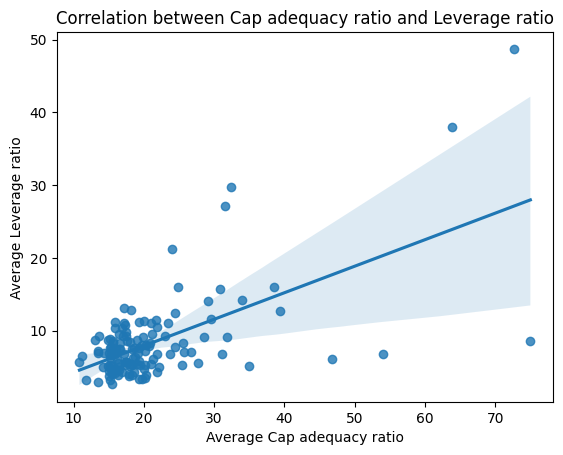

In [110]:
sns.regplot(x="Avg Cap adequacy ratio", y="Avg Leverage ratio", data=df_cap)
plt.xlabel('Average Cap adequacy ratio')
plt.ylabel('Average Leverage ratio')
plt.title('Correlation between Cap adequacy ratio and Leverage ratio')
plt.show()


As we can see from the correlation analysis, the correlation ratio is more than 60% which means that the leverage ratio is significantly positively correlated with the CAR: when one ratio rises, the other follows in the same way.

## Are Basilea standards respected? 

#### Tier 1 Ratio and CET1 Ratio check. 

In [111]:
#Semplice funzione per contare
def count_records(series, value):
    k=0
    for i in series:
        if i < value:
            k = k + 1
    return k

#Creo un dizionario:
#chiave: country code
#valore: [numbers of banks wich don't respect 2016, numbers of bank wich don't respect 2021]
new_country_dict = dict()
for code in country_codes:
    df = country_dict[code]
    a = count_records(df["CET1 ratio 2016"], 4.5)
    b = count_records(df["CET1 ratio 2021"], 4.5)
    new_country_dict[code] = [a, b]

In [112]:
new_country_dict

{'FR': [0, 0],
 'ES': [0, 0],
 'DE': [0, 0],
 'IT': [0, 0],
 'NL': [0, 0],
 'BE': [0, 0],
 'AT': [0, 0],
 'IE': [0, 0],
 'PT': [0, 0],
 'GR': [0, 0],
 'LU': [0, 0],
 'SK': [0, 0],
 'HR': [0, 0],
 'SI': [0, 0],
 'CY': [0, 0],
 'LT': [0, 0],
 'MT': [0, 0],
 'EE': [0, 0],
 'FI': [0, 0],
 'LV': [0, 0]}

All banks respect Basile III standards with respect to Tier 1 and CET1 ratios.

#### Leverage check.

In [113]:
# Leverage check.
def leveragecheck(year):
    print("Leverage check "+ str(year))
    pos = 0
    ratios = {}
    for ratio in data['Leverage ratio '+ str(year)]:
        if ratio < 3:
            ratios[pos] = ratio
        pos += 1
    print('There are', len(ratios), 'banks that do not respect the minimum leverage ratio: ')
    for key in ratios:
        print(data['Bank name'][key],", leverage ratio=", ratios[key])
    print("\n")
    # return ratios #to return a dictionary for each year 
    

leveragecheck(2021)
leveragecheck(2020)
leveragecheck(2019)
leveragecheck(2018)
leveragecheck(2017)
leveragecheck(2016)


Leverage check 2021
There are 4 banks that do not respect the minimum leverage ratio: 
LA BANQUE POSTALE , leverage ratio= 2.4413771671996995
NATIXIS SA , leverage ratio= 2.5738927952106425
HSBC CONTINENTAL EUROPE , leverage ratio= 2.915603779685984
AXA BANQUE , leverage ratio= 2.9004169732646554


Leverage check 2020
There are 4 banks that do not respect the minimum leverage ratio: 
LA BANQUE POSTALE , leverage ratio= 2.470373425070811
NATIXIS SA , leverage ratio= 2.832709674200469
HSBC CONTINENTAL EUROPE , leverage ratio= 2.761715570289204
AXA BANQUE , leverage ratio= 2.9296992255508196


Leverage check 2019
There are 1 banks that do not respect the minimum leverage ratio: 
NATIXIS SA , leverage ratio= 2.6795959368218476


Leverage check 2018
There are 3 banks that do not respect the minimum leverage ratio: 
NATIXIS SA , leverage ratio= 2.8403861988795067
HSBC CONTINENTAL EUROPE , leverage ratio= 2.8997601494368483
NORDDEUTSCHE LANDESBANK - GIROZENTRALE - , leverage ratio= 2.27904319

#### Total capital ratio check

In [114]:
def TCRcheck(year):
    print("Total Capital Ratio "+ str(year))
    pos = 0
    ratios = {}
    for ratio in data_copy['Total Capital Ratio '+ str(year)]:
        if ratio < 10:
            ratios[pos] = ratio
        pos += 1
    print(ratios)
    print("\n")
    return ratios
    

TCRcheck(2021)
TCRcheck(2020)
TCRcheck(2019)
TCRcheck(2018)
TCRcheck(2017)
TCRcheck(2016)

Total Capital Ratio 2021
{}


Total Capital Ratio 2020
{53: 9.610067689960912}


Total Capital Ratio 2019
{}


Total Capital Ratio 2018
{25: 7.478031634446397, 53: 9.20029815781067}


Total Capital Ratio 2017
{53: 8.680482131528864}


Total Capital Ratio 2016
{25: 9.977293976225457, 26: 9.859283904642716, 28: 7.058075070435336, 53: 8.449325793823402}




{25: 9.977293976225457,
 26: 9.859283904642716,
 28: 7.058075070435336,
 53: 8.449325793823402}

## Risk weigted assets analysis.

 **What are risk weighted assets?** 

Risk-weighted assets are used to determine the minimum amount of capital a bank must hold in relation to the risk profile of its lending activities and other assets. This is done in order to reduce the risk of insolvency and protect depositors. These assets are weighted according to their credit risk, which is determined by the likelihood of default or loss.

Therefore, risk-weighted assets provide a more accurate measure of a bank's exposure to risk. To calculate the risk-weighted assets, each asset is assigned a risk weight based on its credit risk. The risk weights are determined by the Basel Committee. 
So, for example, loans backed with collateral are considered to be less risky than others because the collateral is considered in addition to the source of repayment when calculating an asset's risk.

The risk weighted asset intensity is a very useful formula to measure the value of risk-weighted assets per unit of total assets of a bank. 
This means, that the higher this intensity ratio is, the higher the exposure of a bank to high risk-weighted asset components, hence the presence of risky assets, or asset with high value of risk-weight, in the balance sheet.

$ \;\;\; R.W.A.\; Intensity = \frac{Risk \; weighted \; assets}{Total \; assets} $



In [115]:
data.head()

,Bank name,Quoted,Sifi,Country ISO code,Consolidation code,Specialisation,Last avail. year,Tier 1 2021,Tier 1 2020,Tier 1 2019,Tier 1 2018,Tier 1 2017,Tier 1 2016,Common equity (CET1) 2021,Common equity (CET1) 2020,Common equity (CET1) 2019,Common equity (CET1) 2018,Common equity (CET1) 2017,Common equity (CET1) 2016,Total equity 2021,Total equity 2020,Total equity 2019,Total equity 2018,Total equity 2017,Total equity 2016,RWA intensity 2021,RWA intensity 2020,RWA intensity 2019,RWA intensity 2018,RWA intensity 2017,RWA intensity 2016,Total Risk Weighted Assets 2021,Total Risk Weighted Assets 2020,Total Risk Weighted Assets 2019,Total Risk Weighted Assets 2018,Total Risk Weighted Assets 2017,Total Risk Weighted Assets 2016,Total assets 2021,Total assets 2020,Total assets 2019,Total assets 2018,Total assets 2017,Total assets 2016,Cap adequacy ratio 2021,Cap adequacy ratio 2020,Cap adequacy ratio 2019,Cap adequacy ratio 2018,Cap adequacy ratio 2017,Cap adequacy ratio 2016,Tier 1 Ratio (%)\n2021,Tier 1 Ratio (%)\n2020,Tier 1 Ratio (%)\n2019,Tier 1 Ratio (%)\n2018,Tier 1 Ratio (%)\n2017,Tier 1 Ratio (%)\n2016,Leverage ratio 2021,Leverage ratio 2020,Leverage ratio 2019,Leverage ratio 2018,Leverage ratio 2017,Leverage ratio 2016,CET1 ratio 2021,CET1 ratio 2020,CET1 ratio 2019,CET1 ratio 2018,CET1 ratio 2017,CET1 ratio 2016
0,BNP PARIBAS,Yes,Yes,FR,C2,Commercial bank,2022,99668,97772,89962,84773,83766,80944,91389,87732,81204,76131,75741,73562,122507,117349,111845,105726,107209,105220,27.0,28.0,31.0,32.0,33.0,31.0,713671.0,695523.0,668828.0,647001.0,640644.0,638207.0,2634444,2488491,2164713,2040836,1952166,2076959,16.0,16.0,16.0,15.0,15.0,15.0,14.0,14.0,14.0,13.0,13.0,13.0,3.783265,3.928967,4.155840,4.153837,4.290926,3.897236,12.805480,12.613817,12.141238,11.766752,11.822635,11.526354
1,BANCO SANTANDER SA,Yes,Yes,ES,C2,Commercial bank,2022,79939,78126,78964,75838,73293,67834,70208,69399,70497,66904,65563,62068,97053,91322,110659,107361,106833,102699,36.0,37.0,40.0,41.0,42.0,44.0,601845.0,562580.0,605244.0,592319.0,605064.0,588088.0,1595835,1508250,1522695,1459271,1444305,1339125,17.0,16.0,15.0,15.0,15.0,15.0,14.0,14.0,13.0,13.0,12.0,12.0,5.009227,5.179910,5.185805,5.196978,5.074621,5.065547,11.665462,12.335846,11.647699,11.295265,10.835713,10.554203
2,SOCIETE GENERALE,Yes,Yes,FR,C2,Commercial bank,2022,57900,55263,53892,50511,48907,51548,49800,46374,45764,41154,40227,40937,70863,67012,68570,65809,64037,65706,25.0,24.0,25.0,29.0,28.0,26.0,363400.0,351852.0,345010.0,376049.0,353306.0,NaN,1464449,1444404,1356495,1309428,1275128,1354422,19.0,19.0,NaN,NaN,17.0,18.0,16.0,16.0,16.0,13.0,14.0,15.0,3.953705,3.826007,3.972886,3.857486,3.835458,3.805904,13.703908,13.179973,13.264543,10.943787,11.385881,NaN
3,DEUTSCHE BANK AG,Yes,Yes,DE,C2,Commercial bank,2022,54774,50633,48732,52081,52921,46830,46506,44885,44148,47486,48300,42279,68030,62196,62160,68737,68099,64819,27.0,25.0,25.0,26.0,23.0,22.0,351630.0,328952.0,324015.0,350432.0,343316.0,356235.0,1323993,1325259,1297674,1348137,1474732,1590546,18.0,18.0,17.0,18.0,19.0,17.0,16.0,15.0,15.0,15.0,15.0,13.0,4.137031,3.820612,3.755335,3.863183,3.588516,2.944272,13.225834,13.644848,13.625295,13.550703,14.068671,11.868289
4,INTESA SANPAOLO,Yes,No,IT,C2,Commercial bank,2022,51999,56427,43048,37928,43465,39459,45735,48941,38952,33072,38051,35926,64066,66321,56522,54350,56604,49319,31.0,35.0,37.0,35.0,36.0,39.0,326903.0,347072.0,298524.0,276446.0,286825.0,283918.0,1069003,1002614,816570,787790,796861,725138,19.0,20.0,18.0,18.0,18.0,17.0,16.0,16.0,14.0,14.0,15.0,14.0,4.864252,5.627988,5.271808,4.814481,5.454527,5.441585,13.990389,14.101109,13.048197,11.963277,13.266277,12.653654


##### Comparison by country

In [116]:
#Creating empty dataframes for average RWA and average RWA intensity per country.
avg_RWA_by_country = pd.DataFrame({"Country" : country_codes})

avg_RWAint_by_country = pd.DataFrame({"Country" : country_codes})


In [117]:
data.head()

,Bank name,Quoted,Sifi,Country ISO code,Consolidation code,Specialisation,Last avail. year,Tier 1 2021,Tier 1 2020,Tier 1 2019,Tier 1 2018,Tier 1 2017,Tier 1 2016,Common equity (CET1) 2021,Common equity (CET1) 2020,Common equity (CET1) 2019,Common equity (CET1) 2018,Common equity (CET1) 2017,Common equity (CET1) 2016,Total equity 2021,Total equity 2020,Total equity 2019,Total equity 2018,Total equity 2017,Total equity 2016,RWA intensity 2021,RWA intensity 2020,RWA intensity 2019,RWA intensity 2018,RWA intensity 2017,RWA intensity 2016,Total Risk Weighted Assets 2021,Total Risk Weighted Assets 2020,Total Risk Weighted Assets 2019,Total Risk Weighted Assets 2018,Total Risk Weighted Assets 2017,Total Risk Weighted Assets 2016,Total assets 2021,Total assets 2020,Total assets 2019,Total assets 2018,Total assets 2017,Total assets 2016,Cap adequacy ratio 2021,Cap adequacy ratio 2020,Cap adequacy ratio 2019,Cap adequacy ratio 2018,Cap adequacy ratio 2017,Cap adequacy ratio 2016,Tier 1 Ratio (%)\n2021,Tier 1 Ratio (%)\n2020,Tier 1 Ratio (%)\n2019,Tier 1 Ratio (%)\n2018,Tier 1 Ratio (%)\n2017,Tier 1 Ratio (%)\n2016,Leverage ratio 2021,Leverage ratio 2020,Leverage ratio 2019,Leverage ratio 2018,Leverage ratio 2017,Leverage ratio 2016,CET1 ratio 2021,CET1 ratio 2020,CET1 ratio 2019,CET1 ratio 2018,CET1 ratio 2017,CET1 ratio 2016
0,BNP PARIBAS,Yes,Yes,FR,C2,Commercial bank,2022,99668,97772,89962,84773,83766,80944,91389,87732,81204,76131,75741,73562,122507,117349,111845,105726,107209,105220,27.0,28.0,31.0,32.0,33.0,31.0,713671.0,695523.0,668828.0,647001.0,640644.0,638207.0,2634444,2488491,2164713,2040836,1952166,2076959,16.0,16.0,16.0,15.0,15.0,15.0,14.0,14.0,14.0,13.0,13.0,13.0,3.783265,3.928967,4.155840,4.153837,4.290926,3.897236,12.805480,12.613817,12.141238,11.766752,11.822635,11.526354
1,BANCO SANTANDER SA,Yes,Yes,ES,C2,Commercial bank,2022,79939,78126,78964,75838,73293,67834,70208,69399,70497,66904,65563,62068,97053,91322,110659,107361,106833,102699,36.0,37.0,40.0,41.0,42.0,44.0,601845.0,562580.0,605244.0,592319.0,605064.0,588088.0,1595835,1508250,1522695,1459271,1444305,1339125,17.0,16.0,15.0,15.0,15.0,15.0,14.0,14.0,13.0,13.0,12.0,12.0,5.009227,5.179910,5.185805,5.196978,5.074621,5.065547,11.665462,12.335846,11.647699,11.295265,10.835713,10.554203
2,SOCIETE GENERALE,Yes,Yes,FR,C2,Commercial bank,2022,57900,55263,53892,50511,48907,51548,49800,46374,45764,41154,40227,40937,70863,67012,68570,65809,64037,65706,25.0,24.0,25.0,29.0,28.0,26.0,363400.0,351852.0,345010.0,376049.0,353306.0,NaN,1464449,1444404,1356495,1309428,1275128,1354422,19.0,19.0,NaN,NaN,17.0,18.0,16.0,16.0,16.0,13.0,14.0,15.0,3.953705,3.826007,3.972886,3.857486,3.835458,3.805904,13.703908,13.179973,13.264543,10.943787,11.385881,NaN
3,DEUTSCHE BANK AG,Yes,Yes,DE,C2,Commercial bank,2022,54774,50633,48732,52081,52921,46830,46506,44885,44148,47486,48300,42279,68030,62196,62160,68737,68099,64819,27.0,25.0,25.0,26.0,23.0,22.0,351630.0,328952.0,324015.0,350432.0,343316.0,356235.0,1323993,1325259,1297674,1348137,1474732,1590546,18.0,18.0,17.0,18.0,19.0,17.0,16.0,15.0,15.0,15.0,15.0,13.0,4.137031,3.820612,3.755335,3.863183,3.588516,2.944272,13.225834,13.644848,13.625295,13.550703,14.068671,11.868289
4,INTESA SANPAOLO,Yes,No,IT,C2,Commercial bank,2022,51999,56427,43048,37928,43465,39459,45735,48941,38952,33072,38051,35926,64066,66321,56522,54350,56604,49319,31.0,35.0,37.0,35.0,36.0,39.0,326903.0,347072.0,298524.0,276446.0,286825.0,283918.0,1069003,1002614,816570,787790,796861,725138,19.0,20.0,18.0,18.0,18.0,17.0,16.0,16.0,14.0,14.0,15.0,14.0,4.864252,5.627988,5.271808,4.814481,5.454527,5.441585,13.990389,14.101109,13.048197,11.963277,13.266277,12.653654


In [118]:
#creating dataframe for average assets by country
avg_assets_bycountry= pd.DataFrame({"Country" : country_codes})

for year in range(2016,2022):
    list_assets = []
    for country in country_codes:
        list_assets.append(data[data['Country ISO code'] == country]['Total assets ' + str(year)].mean(skipna= True))
    avg_assets_bycountry[str(year)] = list_assets

avg_assets_bycountry

,Country,2016,2017,2018,2019,2020,2021
0,FR,377045.266667,360190.666667,371667.266667,391968.066667,458499.200000,475771.266667
1,ES,220041.769231,228496.461538,229221.000000,237435.384615,246669.076923,268047.538462
2,DE,260968.000000,247078.846154,236446.769231,236567.923077,246164.923077,241188.000000
3,IT,152146.769231,155703.461538,154612.846154,160979.230769,184959.307692,193897.615385
4,NL,169957.125000,169643.875000,173145.375000,174771.875000,184666.875000,188082.125000
5,BE,130676.857143,129266.857143,128521.571429,135510.000000,146495.857143,150938.000000
6,AT,43868.727273,46938.909091,48974.090909,51392.363636,57463.818182,62998.818182
7,IE,63158.000000,60154.500000,60539.500000,64610.500000,70805.000000,77908.500000
8,PT,24348.384615,24289.000000,24203.692308,24315.076923,25629.769231,27751.846154
9,GR,48844.666667,42801.666667,41031.666667,41664.333333,47533.333333,51594.333333


In [119]:
#Average RWA for EMU countries. 
for year in range(2016,2022):
    list_RWA = []
    for country in country_codes:
        list_RWA.append(data[data['Country ISO code'] == country]['Total Risk Weighted Assets ' + str(year)].mean(skipna= True))
    avg_RWA_by_country[str(year)] = list_RWA 

avg_RWA_by_country

#Average RWA intensity 
for year in range(2016,2022):
    list_RWAintensity = []
    for country in country_codes:
        list_RWAintensity.append(data[data['Country ISO code'] == country]['RWA intensity ' + str(year)].mean(skipna= True))
    avg_RWAint_by_country[str(year)] = list_RWAintensity 



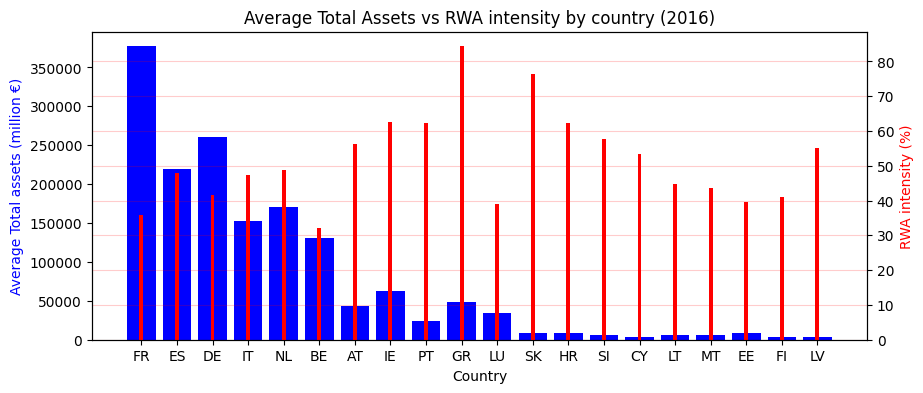

In [120]:
# Producing the plot for average assetss vs RWA intensity by comparing countries, year is 2016

fig, ax1 = plt.subplots(figsize = (10, 4))
ax1.bar(avg_assets_bycountry['Country'], avg_assets_bycountry['2016'], color = "blue")
ax1.set_xlabel('Country')
ax1.set_ylabel('Average Total assets (million €)', color='b')
plt.title("Average Total Assets vs RWA intensity by country (2016)")

# Create the second plot for RWA intensity with the second y-axis
ax2 = ax1.twinx()
ax2.bar(avg_RWAint_by_country['Country'], avg_RWAint_by_country['2016'], width = 0.11, color ='red')
ax2.set_ylabel('RWA intensity (%)', color='r')

plt.grid(color = '#FF000044', alpha=0.2)

# Show the plot
plt.show()

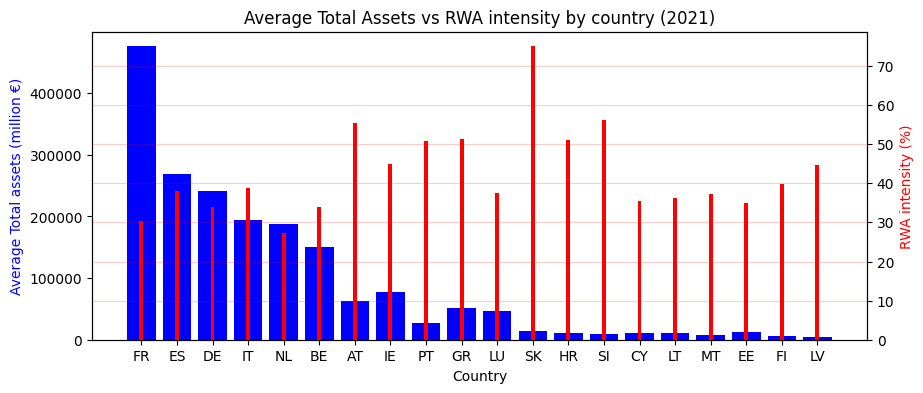

In [121]:
# Producing the plot for average assetss vs RWA intensity by comparing countries, year is 2021

fig, ax1 = plt.subplots(figsize = (10, 4))
ax1.bar(avg_assets_bycountry['Country'], avg_assets_bycountry['2021'], color = "blue")
ax1.set_xlabel('Country')
ax1.set_ylabel('Average Total assets (million €)', color='b')
plt.title("Average Total Assets vs RWA intensity by country (2021)")

# Create the second plot for RWA intensity with the second y-axis
ax2 = ax1.twinx()
ax2.bar(avg_RWAint_by_country['Country'], avg_RWAint_by_country['2021'], width = 0.11, color ='red')
ax2.set_ylabel('RWA intensity (%)', color='r')

plt.grid(color = '#FF000044', alpha=0.2)

# Show the plot
plt.show()

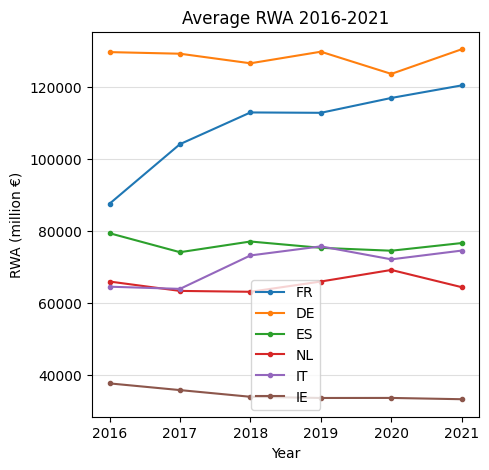

In [122]:
#Average  RWA evolution for EU countries

# Generate some dummy data
years = np.arange(2016, 2022)

# Create a figure and axis object
fig, ax = plt.subplots(figsize= (5, 5))

# Set the plot title and axis labels
ax.set_title('Average RWA 2016-2021')
ax.set_xlabel('Year')
ax.set_ylabel('RWA (million €)')

# Plot the data as line plots
ax.plot(years, avg_RWA_by_country.iloc[0,1:], marker='.', label='FR')
ax.plot(years, avg_RWA_by_country.iloc[1,1:], marker='.', label='DE')
ax.plot(years, avg_RWA_by_country.iloc[2,1:], marker='.', label='ES')
ax.plot(years, avg_RWA_by_country.iloc[3,1:], marker='.', label='NL')
ax.plot(years, avg_RWA_by_country.iloc[4,1:], marker='.', label='IT')
ax.plot(years, avg_RWA_by_country.iloc[7,1:], marker='.', label='IE')

# Set the tick labels for the x-axis
ax.set_xticks(years)
ax.set_xticklabels(years)

# Add a legend
ax.legend()
plt.grid(alpha=0.4, axis='y')
plt.show()   

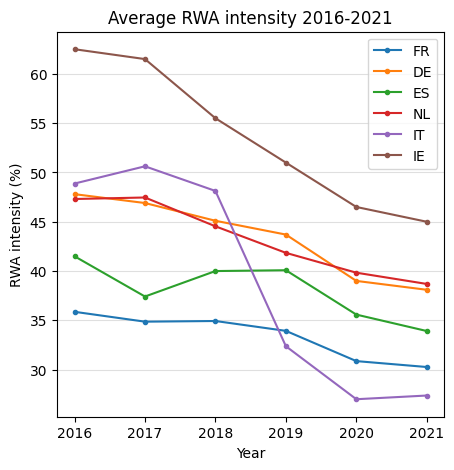

In [123]:
#Average  RWA evolution for EU countries

# Generate some dummy data
years = np.arange(2016, 2022)

# Create a figure and axis object
fig, ax = plt.subplots(figsize= (5, 5))

# Set the plot title and axis labels
ax.set_title('Average RWA intensity 2016-2021')
ax.set_xlabel('Year')
ax.set_ylabel('RWA intensity (%)')

# Plot the data as line plots
ax.plot(years, avg_RWAint_by_country.iloc[0,1:], marker='.', label='FR')
ax.plot(years, avg_RWAint_by_country.iloc[1,1:], marker='.', label='DE')
ax.plot(years, avg_RWAint_by_country.iloc[2,1:], marker='.', label='ES')
ax.plot(years, avg_RWAint_by_country.iloc[3,1:], marker='.', label='NL')
ax.plot(years, avg_RWAint_by_country.iloc[4,1:], marker='.', label='IT')
ax.plot(years, avg_RWAint_by_country.iloc[7,1:], marker='.', label='IE')

# Set the tick labels for the x-axis
ax.set_xticks(years)
ax.set_xticklabels(years)

ax.legend()
plt.grid(alpha=0.4, axis='y')
plt.show()   

##### Comparison by specialisation

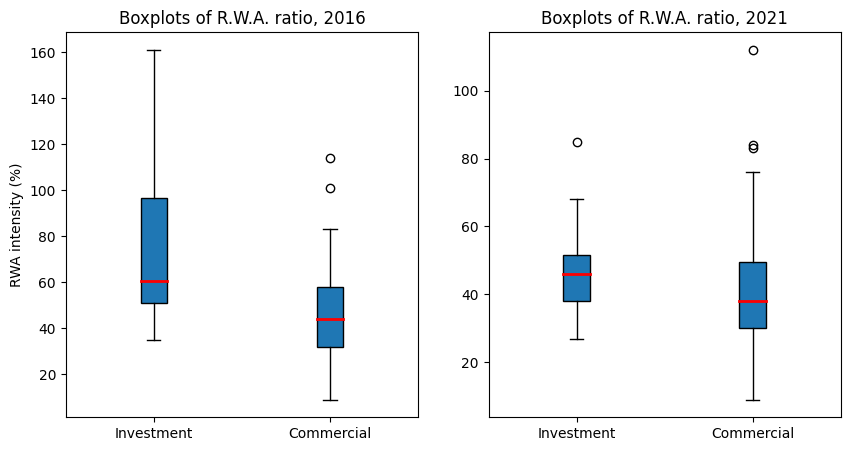

In [124]:
#Boxplot for distributions of Risk Weighted assets:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].boxplot([data[data['Specialisation'] == 'Investment bank']['RWA intensity 2016'].dropna(), data[data['Specialisation'] == 'Commercial bank']['RWA intensity 2016'].dropna()],
                vert=True,  # vertical box alignment
                patch_artist=True,  # fill with color
                labels=['Investment', 'Commercial'], 
                medianprops = {'color':'red', 'linewidth':2})  # will be used to label x-ticks
axs[0].set_title('Boxplots of R.W.A. ratio, 2016')
axs[0].set_ylabel('RWA intensity (%)')

axs[1].boxplot([data[data['Specialisation'] == 'Investment bank']['RWA intensity 2021'].dropna(), data[data['Specialisation'] == 'Commercial bank']['RWA intensity 2021'].dropna()],
                vert=True,  # vertical box alignment
                patch_artist=True,  # fill with color
                labels=['Investment', 'Commercial'],
                medianprops = {'color':'red', 'linewidth':2})  # will be used to label x-ticks
axs[1].set_title('Boxplots of R.W.A. ratio, 2021')


# Show the plot
plt.show()


In [125]:

avg_assets_by_spec = pd.DataFrame({"Specialisation" : specialisations})

avg_RWA_by_spec = pd.DataFrame({"Specialisation" : specialisations})

avg_RWAint_by_spec = pd.DataFrame({"Specialisation" : specialisations})

In [126]:
#Average RWA
for year in range(2016,2022):
    list_RWA = []
    for spec in specialisations:
        list_RWA.append(data[data['Specialisation'] == spec]['Total Risk Weighted Assets ' + str(year)].mean(skipna= True))
    avg_RWA_by_spec[str(year)] = list_RWA

#Average assets 
for year in range(2016,2022):
    list_assets = []
    for spec in specialisations:
        list_assets.append(data[data['Specialisation'] == spec]['Total assets ' + str(year)].mean(skipna= True))
    avg_assets_by_spec[str(year)] = list_assets

#Average RWA intensity 
for year in range(2016,2022):
    list_RWAintensity = []
    for spec in specialisations:
        list_RWAintensity.append(data[data['Specialisation'] == spec]['RWA intensity ' + str(year)].mean(skipna= True))
    avg_RWAint_by_spec[str(year)] = list_RWAintensity 

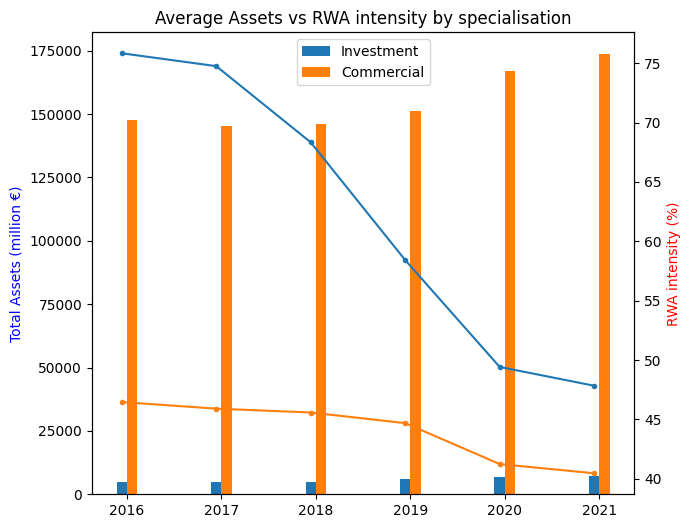

In [127]:
# Set the width and positions of the bars
fig, ax1 = plt.subplots(figsize = (7,6))

bar_width = 0.11
x_years = np.arange(2016, 2022)

# Plot the bars average assets
ax1.bar(x_years, avg_assets_by_spec.iloc[0,1:], width = bar_width, label='Investment')
ax1.bar(x_years+ bar_width, avg_assets_by_spec.iloc[1,1:], width = bar_width, label='Commercial')


# Set the x-axis tick labels
ax1.set_xticks(x_years + bar_width / 2)
ax1.set_xticklabels(np.arange(2016, 2022))
ax1.legend(loc='upper center')
ax1.set_ylabel('Total Assets (million €)',color='b')

# Create the second plot for RWA intensity with the second y-axis
ax2 = ax1.twinx()
ax2.plot(x_years, avg_RWAint_by_spec.iloc[0,1:], marker='.')
ax2.plot(x_years, avg_RWAint_by_spec.iloc[1,1:], marker='.')
ax2.set_ylabel('RWA intensity (%)', color='r')


plt.title("Average Assets vs RWA intensity by specialisation")
plt.show()

As we can see from plot, the average increase of Total Assets during the period 2016-2021 was followed by a drop in the intensity of risk weighted assets for both commercial and investment banks. 
Recalling that R.W.A. intensity is $ \frac{Risk\,weighted\,assets}{Total\; assets}$ , this ratio is useful for evaluate the value of risk-weighted assets per unit of total assets of a bank. Hence, we can say that the higher the ratio is, the higher the exposure of a bank to high risk-weighted asset components.

It's clear from the plot above that both IB and CB were subject to a decrease in R.W.A intensity, even if IB experienced a steeper downfall.
But why the investment banks had on average a higher RWA ratio? This is mainly due to the fact that investment banks have a composition of the BS more oriented towards securities, repurchase agreements and trading assets with higher risk weights that determine a higher risk weighted assets ratio level compared to commercial banks. Commercial banks on the other hand primarily hold loans in their asset side of the BS. Loans have different risk-weights based on the nature of the underlying asset of the loans, but in any case the risk-weights are lower than other assets. 

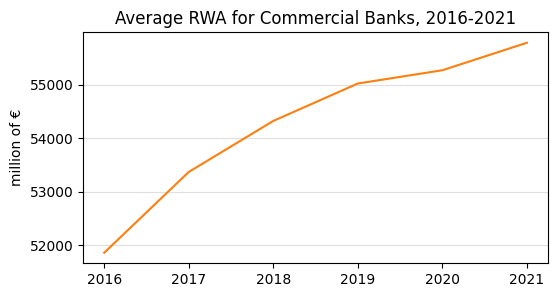

In [128]:
plt.figure(figsize = (6,3))
plt.plot(x_years, avg_RWA_by_spec.iloc[1,1:],  color = 'C1', label='Commercial')
plt.title('Average RWA for Commercial Banks, 2016-2021')
plt.ylabel('million of €')
plt.grid(alpha=0.4, axis='y')
plt.show()

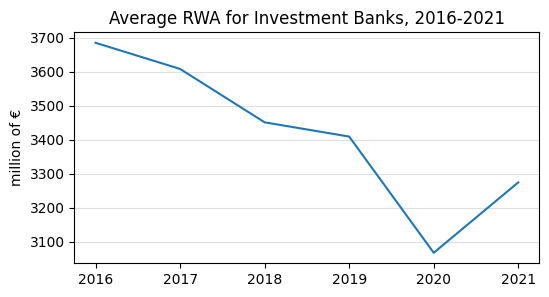

In [129]:
plt.figure(figsize = (6,3))
plt.plot(x_years, avg_RWA_by_spec.iloc[0,1:],  label='Investment')
plt.title('Average RWA for Investment Banks, 2016-2021')
plt.ylabel('million of €')
plt.grid(alpha=0.4, axis='y')
plt.show()

### Comparison before and after BASIL III (pre 2009 crisis).

One empirical question that raised our concernes is whether Basilea III was effectful in mitigating risk situations for banks after the 2008 crisis. In order to answer this question, we decided to gather data referred to the so called "risk weighted asset intensity" for banks during the period 2003-2008. 


In [130]:
data2008 = pd.read_excel("RWA_preBASIL3.xlsx", sheet_name="Sheet1")
data2008.head()

,Company name Latin alphabet,Inactive,Quoted,Country ISO code,Consolidation code,Last avail. year,Risk weighted asset intensity (RWA / Total Assets) (%)\n2009,Risk weighted asset intensity (RWA / Total Assets) (%)\n2008,Risk weighted asset intensity (RWA / Total Assets) (%)\n2007,Risk weighted asset intensity (RWA / Total Assets) (%)\n2006,Risk weighted asset intensity (RWA / Total Assets) (%)\n2005,Risk weighted asset intensity (RWA / Total Assets) (%)\n2004,Total risk weighted assets (RWAs) - Transitional (highest)\nm EUR 2009,Total risk weighted assets (RWAs) - Transitional (highest)\nm EUR 2008,Total risk weighted assets (RWAs) - Transitional (highest)\nm EUR 2007,Total risk weighted assets (RWAs) - Transitional (highest)\nm EUR 2006,Total risk weighted assets (RWAs) - Transitional (highest)\nm EUR 2005,Total assets\nm EUR 2009,Total assets\nm EUR 2008,Total assets\nm EUR 2007,Total assets\nm EUR 2006,Total assets\nm EUR 2005,RWA Intensity 2009,RWA Intensity 2008,RWA Intensity 2007,RWA Intensity 2006
0,BNP PARIBAS,No,Yes,FR,C2,2022,30.165457,25.421828,31.892279,32.110407,30.021962,n.a.,620714,527643,540400,462500,377700,2057698,2075551,1694454,1440343,1258079,0.301655,0.254218,0.318923,0.321104
1,BANCO SANTANDER SA,No,Yes,ES,C2,2022,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,1110529.458,1049631.55,912914.971,833872.715,809106.914,NaN,NaN,NaN,NaN
2,SOCIETE GENERALE,No,Yes,FR,C2,2022,31.657681,30.576733,30.460867,29.840381,30.504446,n.a.,324080,345518,326468,285525,254753,1023701,1130003,1071762,956841,835134,0.316577,0.305767,0.304609,0.298404
3,DEUTSCHE BANK AG,No,Yes,DE,C2,2022,18.223666,13.972384,17.081428,17.384678,25.318673,n.a.,273476,307731,328818,275459,251202,1500664,2202423,1925003,1584493,992161,0.182237,0.139724,0.170814,0.173847
4,ING BANK NV,No,No,NL,C2,2021,37.679157,33.187557,40.511189,37.757728,38.326089,n.a.,332375,343388,402727,337926,319653,882119,1034689,994113,894985,834035,0.376792,0.331876,0.405112,0.377577


In [131]:
data2008.replace("n.a.", np.nan, inplace=True)

In [132]:
RWA_2008_bycountry = pd.DataFrame({"Country" : country_codes[:8]}) #selecting some countries (France, Spain, Germany, Netherlands, Italy, Belgium, Austria , Ireland)
list_RWA_2008 = []
for country in country_codes[:8]:
        list_RWA_2008.append(data2008[data2008['Country ISO code'] == country]['RWA Intensity 2006'].mean(skipna= True))

RWA_2008_bycountry['2006'] = list_RWA_2008
RWA_2008_bycountry['2006'] = RWA_2008_bycountry['2006']*100 #trasforming values in percentages

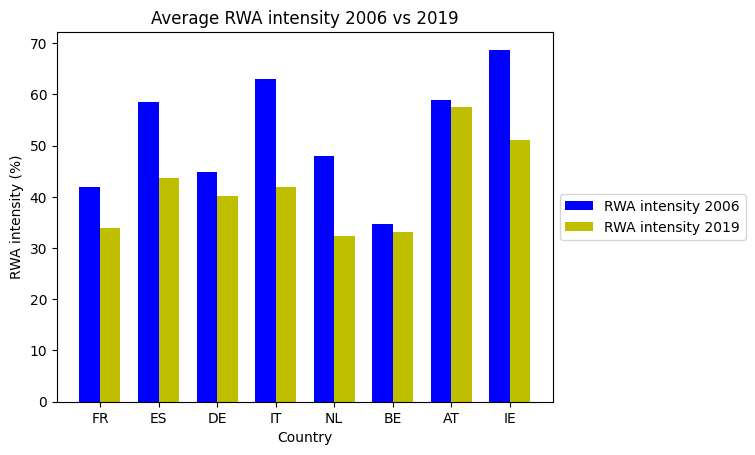

In [133]:
# Set the width and positions of the bars
bar_width = 0.35
x_pos = np.arange(0,8)

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the bars RWA intensity of 2006
ax.bar(x_pos, RWA_2008_bycountry['2006'], width = 0.35, color='b', label='RWA intensity 2006')

# Plot the bars RWA intensity of 2019
ax.bar(x_pos + bar_width,  avg_RWAint_by_country['2019'][:8], width = 0.35, color='y', label='RWA intensity 2019')

# Set the x-axis tick labels
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(RWA_2008_bycountry['Country'][:8])


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Country')
ax.set_ylabel('RWA intensity (%)')
ax.set_title('Average RWA intensity 2006 vs 2019')

plt.show()

We decided to select two years in order to compare the two periods, 2006 and 2019. 
As we can see from the plot, Basilea III was effectful in mitigating risk situation and reduced the overall big presence of risky assets in Banks Balance Sheets during the period before the 2008 great financial crisis. 
Looking closely to the graph, we noticed how there was an overall downward trend for the RWA intensity. These means that the unitary value for risk weighted assets over the total number of assets has decreased from 2008-2019 and so we can infer that the number of 'risky' assets in the Banks balance sheet has decreased. In fact less risky assets means less asset's components with a high risk-weight. 